### **Problem: Binary Classification**

## **Objective: Classification of Rice Types**

# **Introduction**

Source: https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik

A total of 3810 rice grain's images were taken for the two species (Cammeo and Osmancik), processed and feature inferences were made. 7 morphological features were obtained for each grain of rice. In order to classify the rice varieties (Cammeo and Osmancik) used, preliminary processing was applied to the pictures obtained with computer vision system and a total of 3810 rice grains were obtained. Furthermore, 7 morphological features have been inferred for each grain. A data set has been created for the properties obtained.

Inputs:

1.Area: Returns the number of pixels within the boundaries of the rice grain.

2.Perimeter: Calculates the circumference by calculating the distance between pixels around the boundaries of the rice grain.

3.Major Axis Length: The longest line that can be drawn on the rice grain, i.e. the main axis distance, gives.

4.Minor Axis Length: The shortest line that can be drawn on the rice grain, i.e. the small axis distance, gives.

5.Eccentricity: It measures how round the ellipse, which has the same moments as the rice grain, is.

6.Convex Area: Returns the pixel count of the smallest convex shell of the region formed by the rice grain.

7.Extent: Returns the ratio of the region formed by the rice grain to the bounding box pixels

Outputs:

Class: Commeo and Osmancik.

In [1]:
# Exploratory data analysis and plotting libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.io import arff
import warnings
warnings.simplefilter("ignore")

# Feature Selection
import mlxtend
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Models from Scikit-Learn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Model evaluations 
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, RocCurveDisplay 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, average_precision_score

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [2]:
# For fixing random_state parameters
seed = 20

# **1.Importing data**

In [4]:
data = arff.loadarff("Rice_Cammeo_Osmancik.arff")
df = pd.DataFrame(data[0])
df

Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     15231.0  525.578979         229.749878          85.093788      0.928882   
1     14656.0  494.311005         206.020065          91.730972      0.895405   
2     14634.0  501.122009         214.106781          87.768288      0.912118   
3     13176.0  458.342987         193.337387          87.448395      0.891861   
4     14688.0  507.166992         211.743378          89.312454      0.906691   
...       ...         ...                ...                ...           ...   
3805  11441.0  415.858002         170.486771          85.756592      0.864280   
3806  11625.0  421.390015         167.714798          89.462570      0.845850   
3807  12437.0  442.498993         183.572922          86.801979      0.881144   
3808   9882.0  392.296997         161.193985          78.210480      0.874406   
3809  11434.0  404.709991         161.079269          90.868195      0.825692   

      Convex_Area    Extent        Class  
0         15617.0  0.572896    b'Cammeo'  
1         15072.0  0.615436    b'Cammeo'  
2         14954.0  0.693259    b'Cammeo'  
3         13368.0  0.640669    b'Cammeo'  
4         15262.0  0.646024    b'Cammeo'  
...           ...       ...          ...  
3805      11628.0  0.681012  b'Osmancik'  
3806      11904.0  0.694279  b'Osmancik'  
3807      12645.0  0.626739  b'Osmancik'  
3808      10097.0  0.659064  b'Osmancik'  
3809      11591.0  0.802949  b'Osmancik'  

[3810 rows x 8 columns]

# **2.Exploratory data analysis**

#### **2.1.General information about dtypes and null values**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   float64
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   float64
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(7), object(1)
memory usage: 238.2+ KB


#### **2.2.Number of observations and features**

In [5]:
df.shape

(3810, 8)

#### **2.3.Missing values**

In [6]:
df.isna().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

There are no missing values.

#### **2.4.How many of each rice type?**

In [7]:
classes = df["Class"].value_counts()
classes_df = pd.DataFrame(classes)
classes_df = classes.reset_index(level = 0)
classes_df

Class  count
0  b'Osmancik'   2180
1    b'Cammeo'   1630

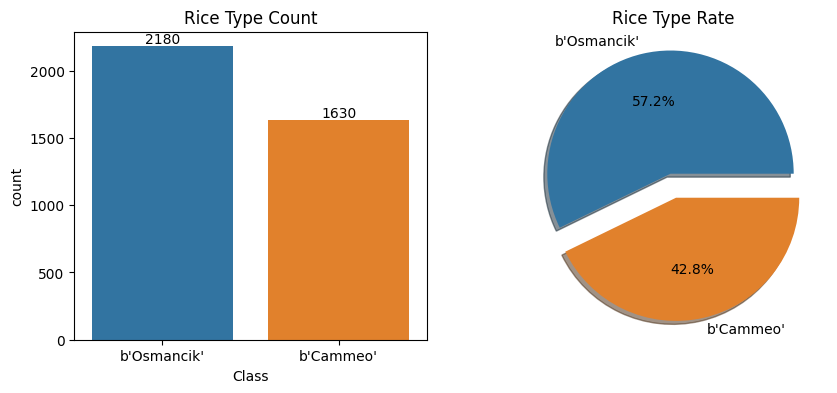

In [8]:
# Plotting rice type counts and rates
cmap = ["#3274a1", "#e1812c","#3a923a","#c03d3e","#857aab","#8d7866"]
wine_cmap = ["#9f7a96","#e0c1c8","#d3b2c6","#f5e7e4"]

plt.subplots(1, 2, figsize = (10, 4))
plt.subplot(121)
ax = sns.barplot(data = classes_df, 
                 x = classes_df["Class"], 
                 y = classes_df["count"])
ax.bar_label(ax.containers[0])
plt.title("Rice Type Count");

plt.subplot(122) 
plt.pie(x = classes, 
        explode = [0.1, 0.1],
        labels = classes.index,
        colors = cmap,
        autopct = "%.1f%%", 
        shadow = True)
plt.title("Rice Type Rate");

#### **2.5.General description of data (count, mean, std, min, max and quartiles)**

In [9]:
df.describe().T

count          mean          std          min  \
Area               3810.0  12667.727559  1732.367706  7551.000000   
Perimeter          3810.0    454.239180    35.597081   359.100006   
Major_Axis_Length  3810.0    188.776222    17.448679   145.264465   
Minor_Axis_Length  3810.0     86.313750     5.729817    59.532406   
Eccentricity       3810.0      0.886871     0.020818     0.777233   
Convex_Area        3810.0  12952.496850  1776.972042  7723.000000   
Extent             3810.0      0.661934     0.077239     0.497413   

                            25%           50%           75%           max  
Area               11370.500000  12421.500000  13950.000000  18913.000000  
Perimeter            426.144753    448.852493    483.683746    548.445984  
Major_Axis_Length    174.353855    185.810059    203.550438    239.010498  
Minor_Axis_Length     82.731695     86.434647     90.143677    107.542450  
Eccentricity           0.872402      0.889050      0.902588      0.948007  
Convex_Area        11626.250000  12706.500000  14284.000000  19099.000000  
Extent                 0.598862      0.645361      0.726562      0.861050

Min and max values, their means and relation with standart deviation seems normal.

#### **2.6.Rice types by features**

<Figure size 2000x1600 with 0 Axes>

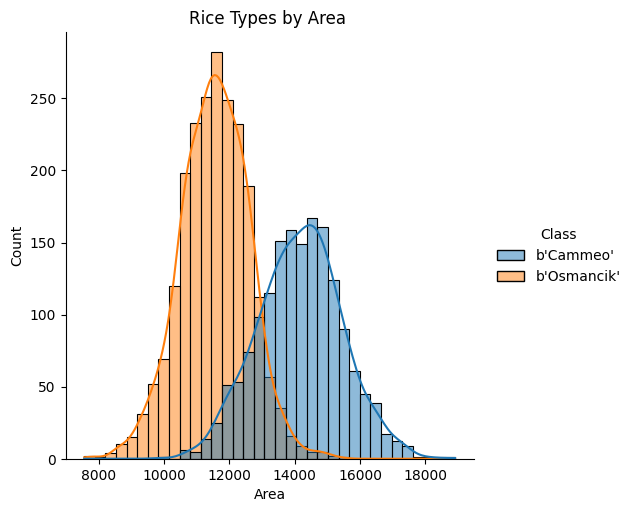

<Figure size 2000x1600 with 0 Axes>

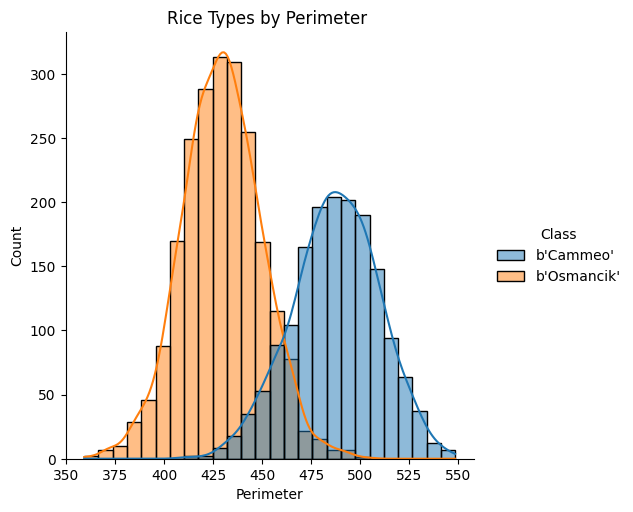

<Figure size 2000x1600 with 0 Axes>

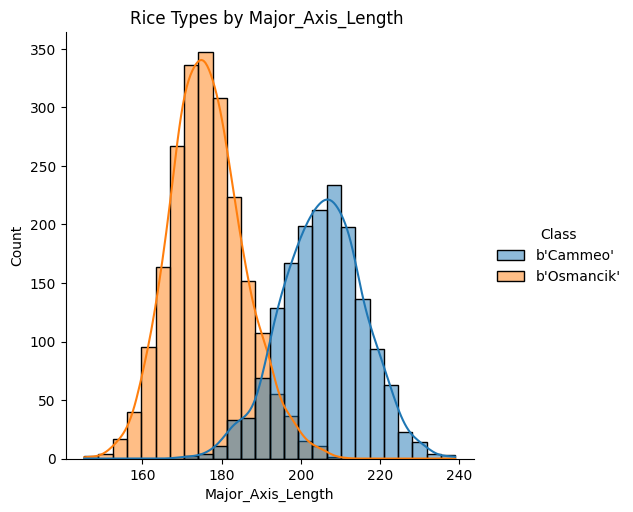

<Figure size 2000x1600 with 0 Axes>

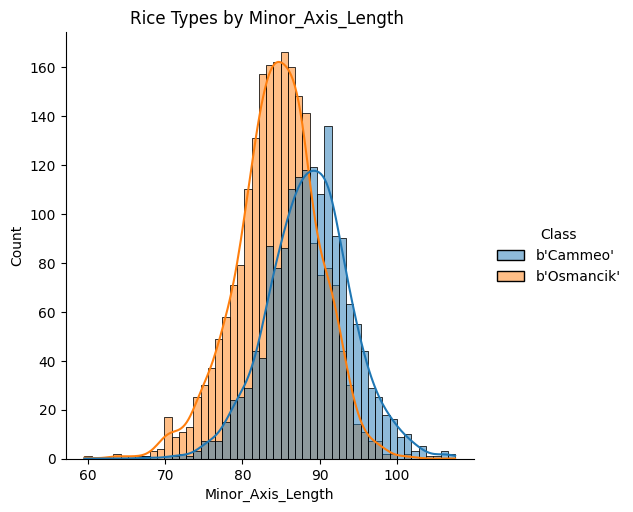

<Figure size 2000x1600 with 0 Axes>

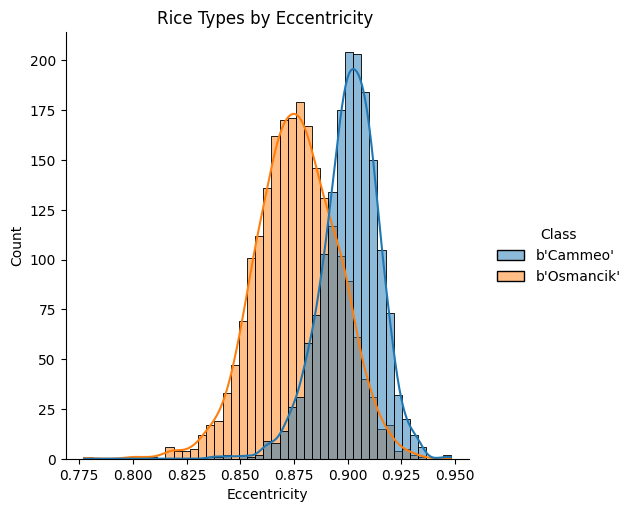

<Figure size 2000x1600 with 0 Axes>

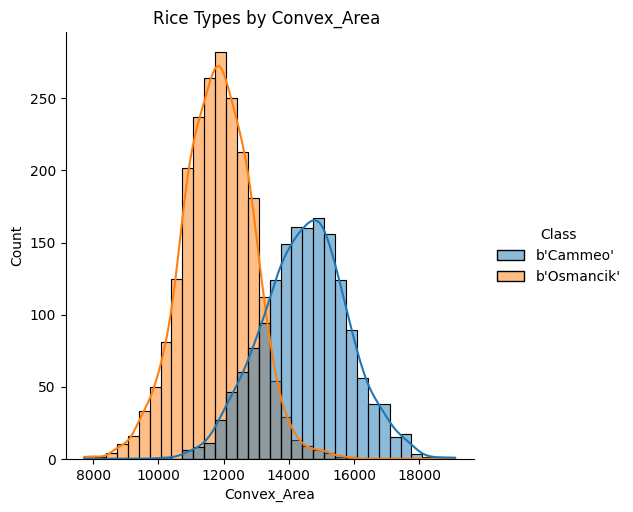

<Figure size 2000x1600 with 0 Axes>

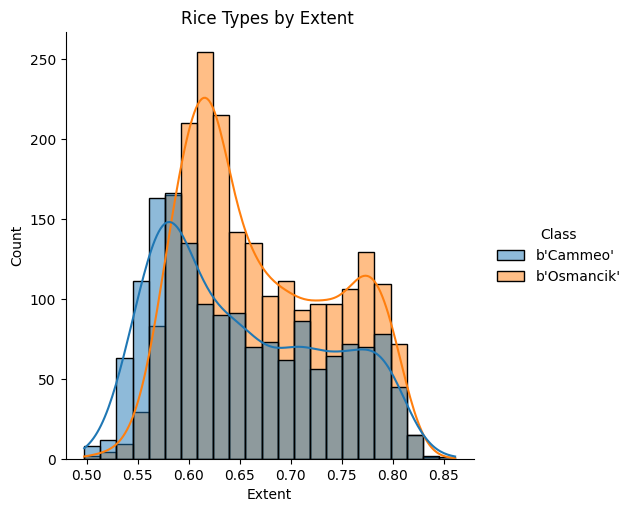

In [10]:
columns = df.columns[:len(df.columns) - 1]
for column in columns:
    plt.figure(figsize = (10,8), dpi = 200)
    sns.displot(data = df, 
                x = str(column), 
                kde = True, 
                hue = "Class").set(title = "Rice Types by {} ".format(str(column)))
    plt.show()

There is a similar distribution of classes by features. Features could be too correlated to each other.

#### **2.7.Distribution of features**

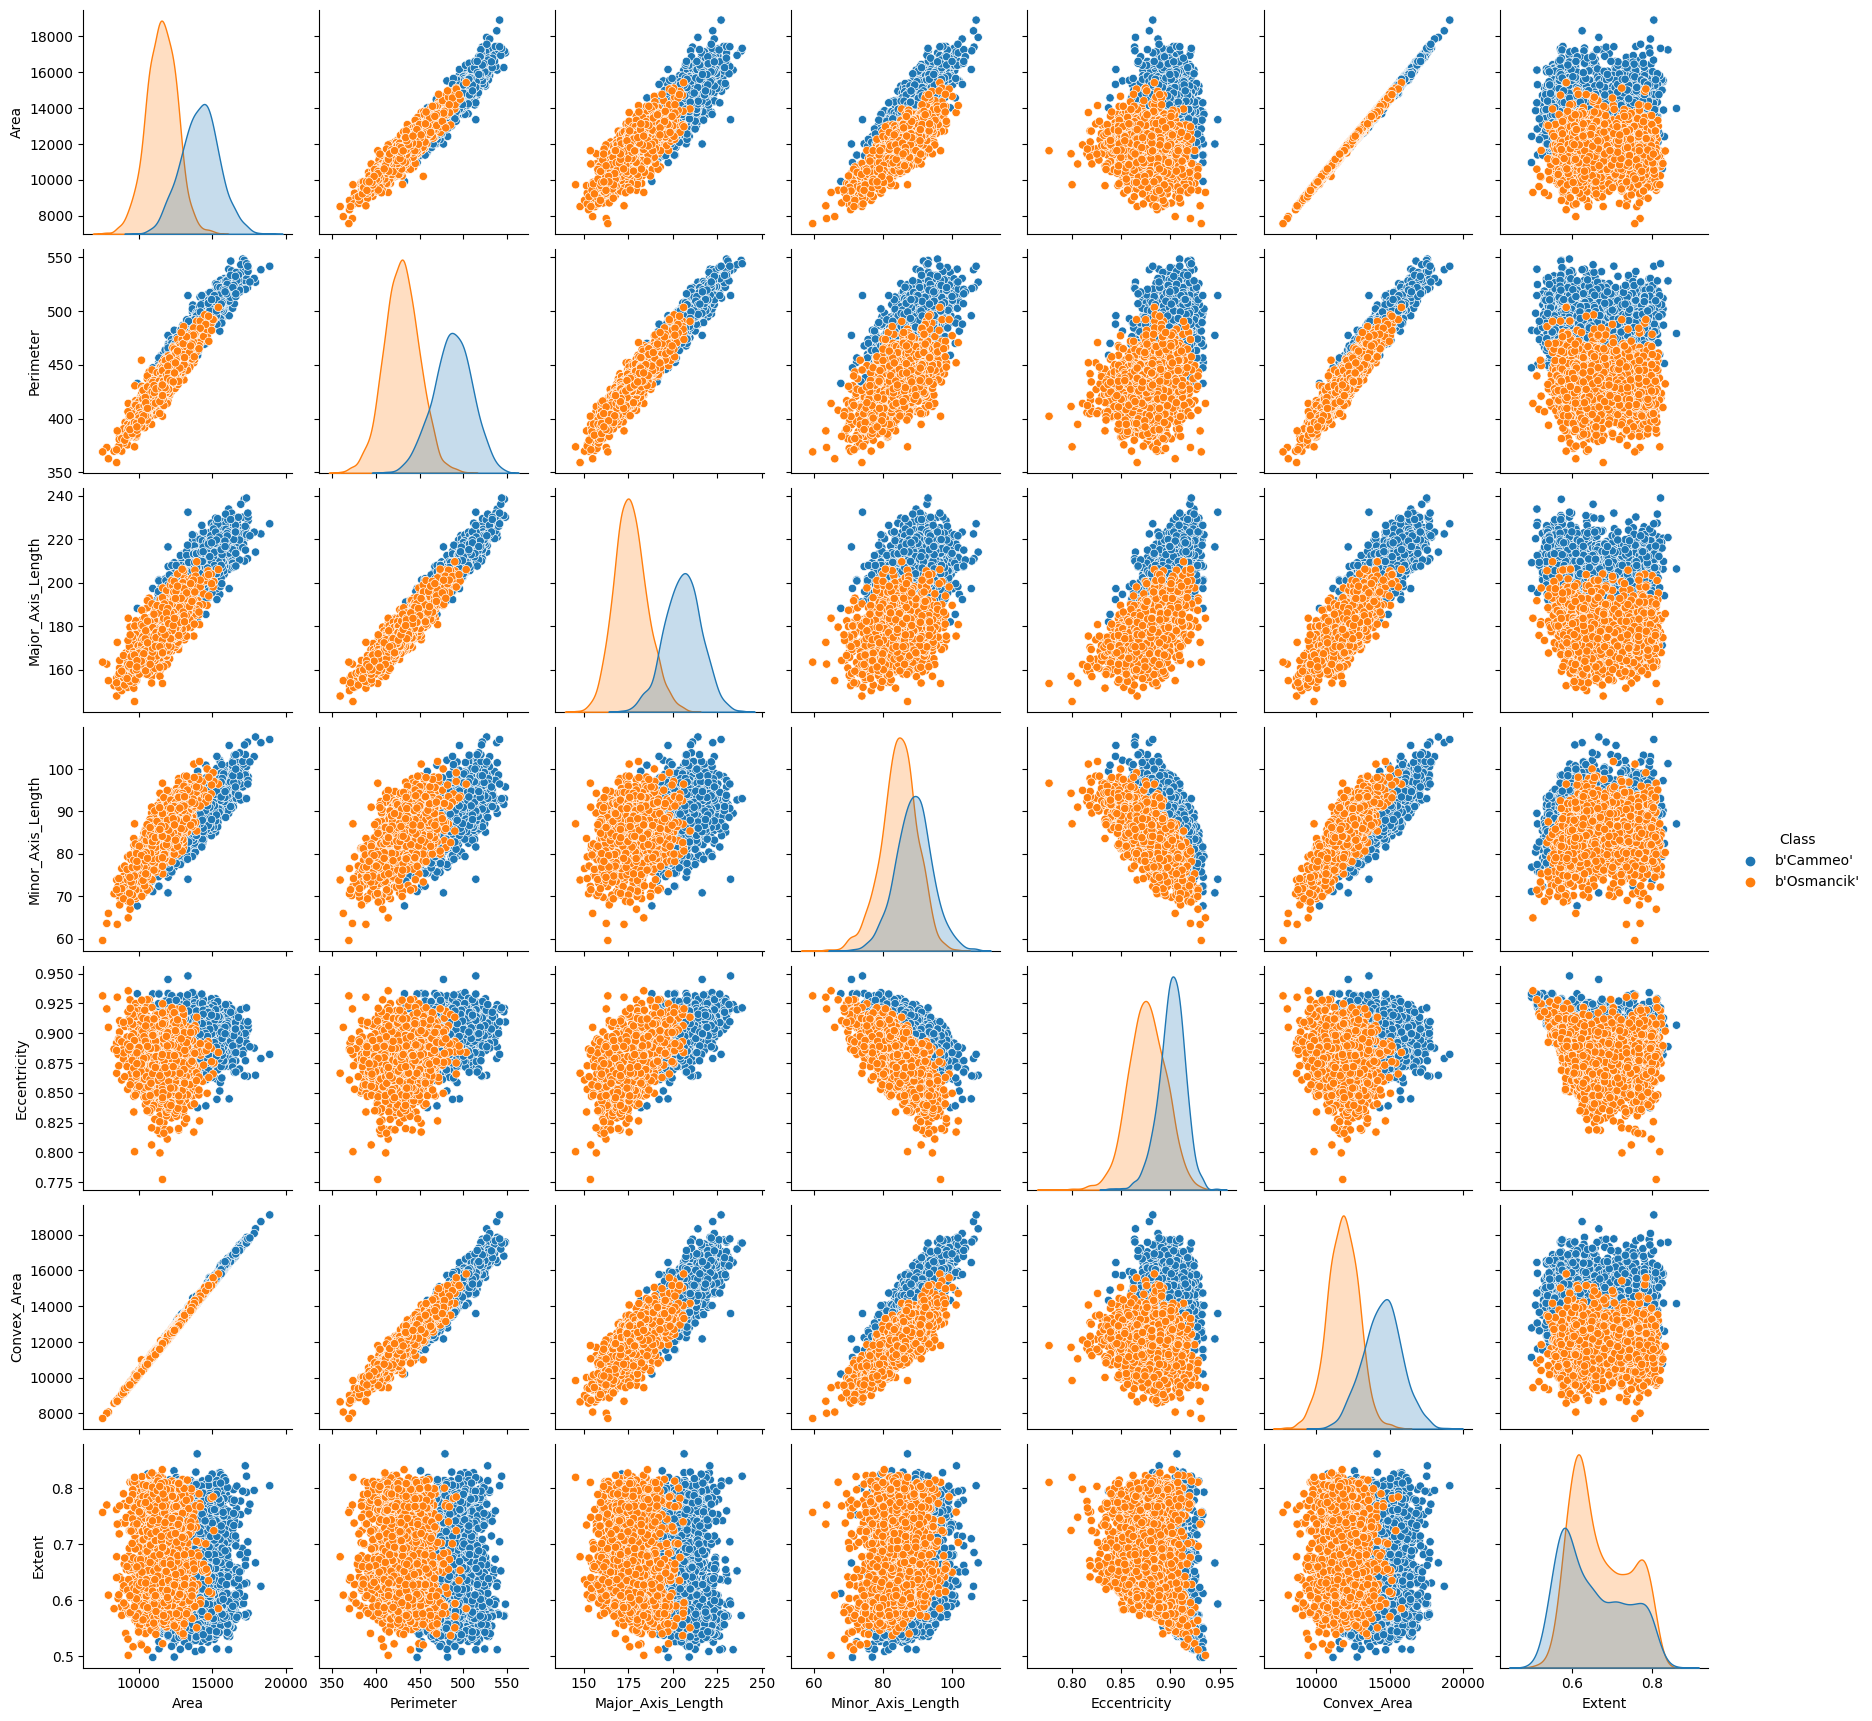

In [11]:
# General distribution
sns.pairplot(df.iloc[:,:], hue = "Class");

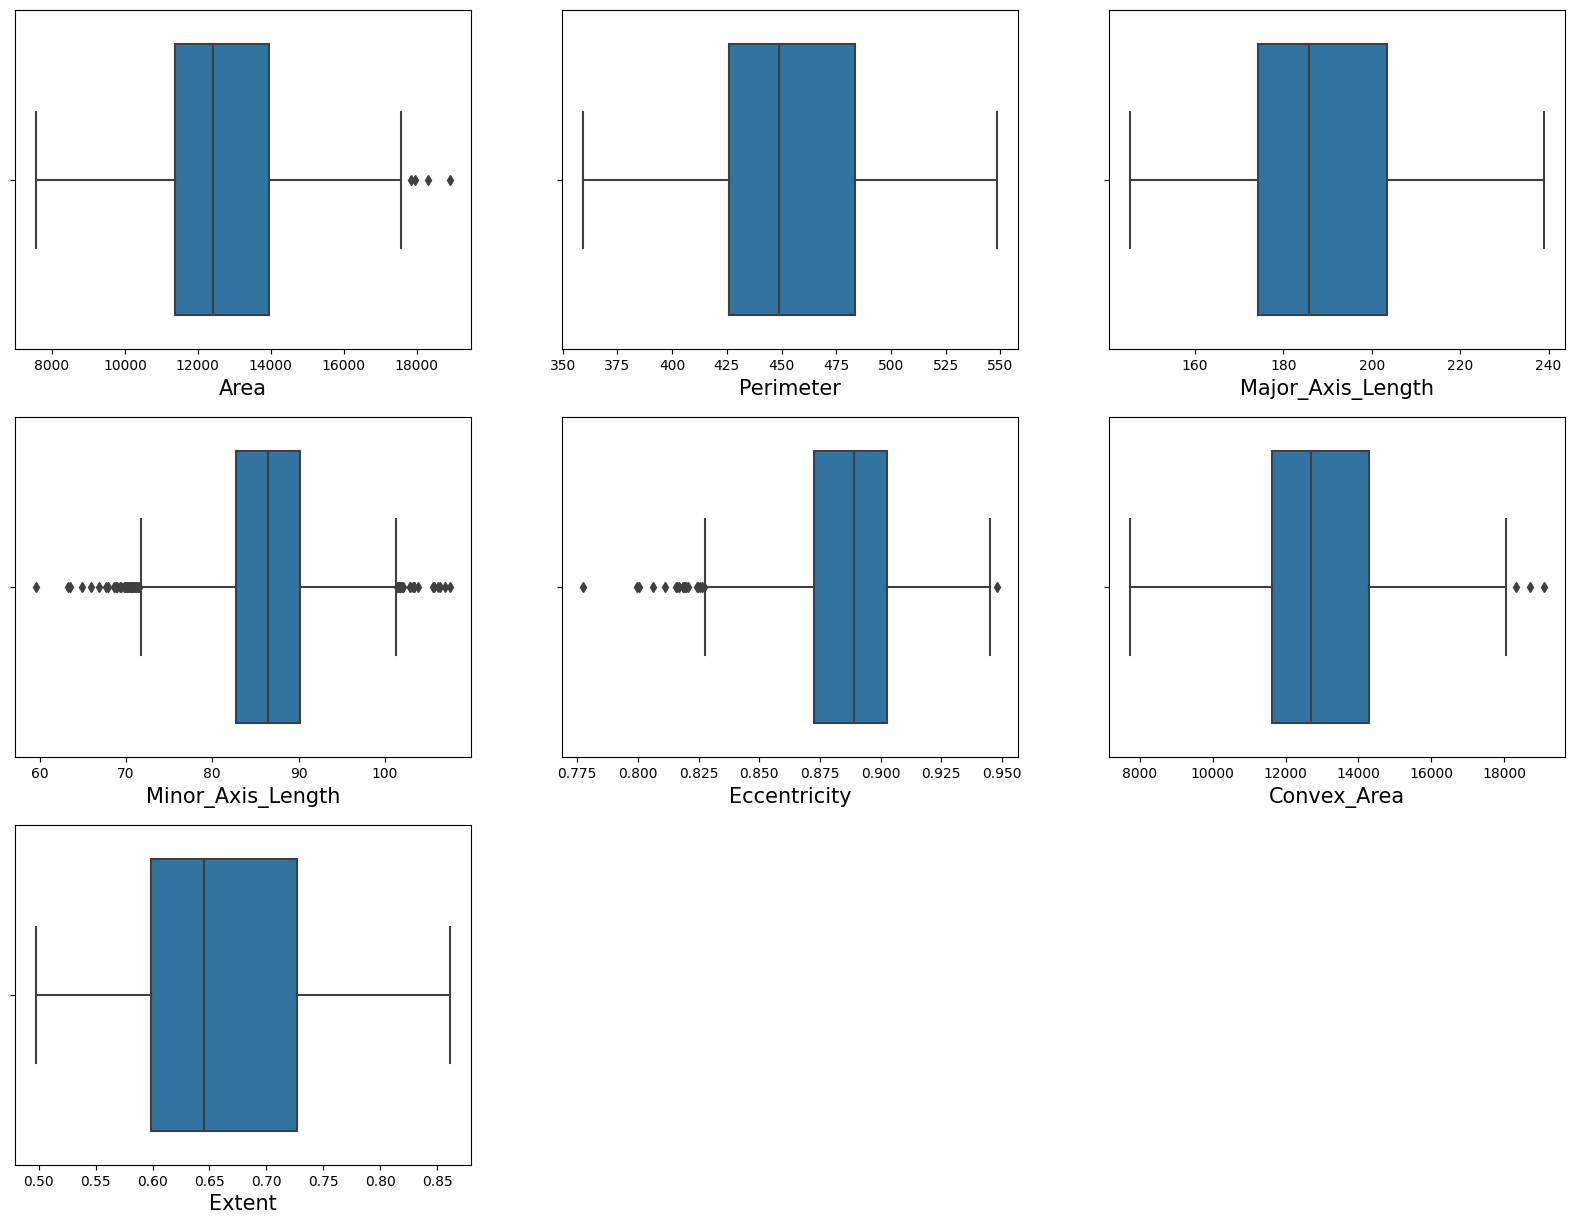

In [12]:
plt.figure(figsize = (20,15))
for i, col in enumerate(df.iloc[:, 0:7]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data = df.iloc[:, 0:7], x = col)
    plt.xlabel(col, fontsize = 15)
    plt.xticks(fontsize = 10)

There appear to be outliers in some features like area, minor axis lenght, eccentricity, convex area.

#### **2.8.Encoding categorical features**

In [13]:
df["Class"] = df["Class"].astype("category")

In [14]:
df["Class"] = df["Class"].cat.codes
df

Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     15231.0  525.578979         229.749878          85.093788      0.928882   
1     14656.0  494.311005         206.020065          91.730972      0.895405   
2     14634.0  501.122009         214.106781          87.768288      0.912118   
3     13176.0  458.342987         193.337387          87.448395      0.891861   
4     14688.0  507.166992         211.743378          89.312454      0.906691   
...       ...         ...                ...                ...           ...   
3805  11441.0  415.858002         170.486771          85.756592      0.864280   
3806  11625.0  421.390015         167.714798          89.462570      0.845850   
3807  12437.0  442.498993         183.572922          86.801979      0.881144   
3808   9882.0  392.296997         161.193985          78.210480      0.874406   
3809  11434.0  404.709991         161.079269          90.868195      0.825692   

      Convex_Area    Extent  Class  
0         15617.0  0.572896      0  
1         15072.0  0.615436      0  
2         14954.0  0.693259      0  
3         13368.0  0.640669      0  
4         15262.0  0.646024      0  
...           ...       ...    ...  
3805      11628.0  0.681012      1  
3806      11904.0  0.694279      1  
3807      12645.0  0.626739      1  
3808      10097.0  0.659064      1  
3809      11591.0  0.802949      1  

[3810 rows x 8 columns]

Class 0: Cammeo

Class 1: Osmancik

#### **2.9.Correlations**

In [15]:
df.corr()

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  \
Area               1.000000   0.966453           0.903015           0.787840   
Perimeter          0.966453   1.000000           0.971884           0.629828   
Major_Axis_Length  0.903015   0.971884           1.000000           0.452092   
Minor_Axis_Length  0.787840   0.629828           0.452092           1.000000   
Eccentricity       0.352095   0.544601           0.710897          -0.291683   
Convex_Area        0.998939   0.969937           0.903381           0.787318   
Extent            -0.061184  -0.130923          -0.139562           0.063366   
Class             -0.746400  -0.806572          -0.827824          -0.370355   

                   Eccentricity  Convex_Area    Extent     Class  
Area                   0.352095     0.998939 -0.061184 -0.746400  
Perimeter              0.544601     0.969937 -0.130923 -0.806572  
Major_Axis_Length      0.710897     0.903381 -0.139562 -0.827824  
Minor_Axis_Length     -0.291683     0.787318  0.063366 -0.370355  
Eccentricity           1.000000     0.352716 -0.198580 -0.588916  
Convex_Area            0.352716     1.000000 -0.065826 -0.750424  
Extent                -0.198580    -0.065826  1.000000  0.117727  
Class                 -0.588916    -0.750424  0.117727  1.000000

(8.5, -0.5)

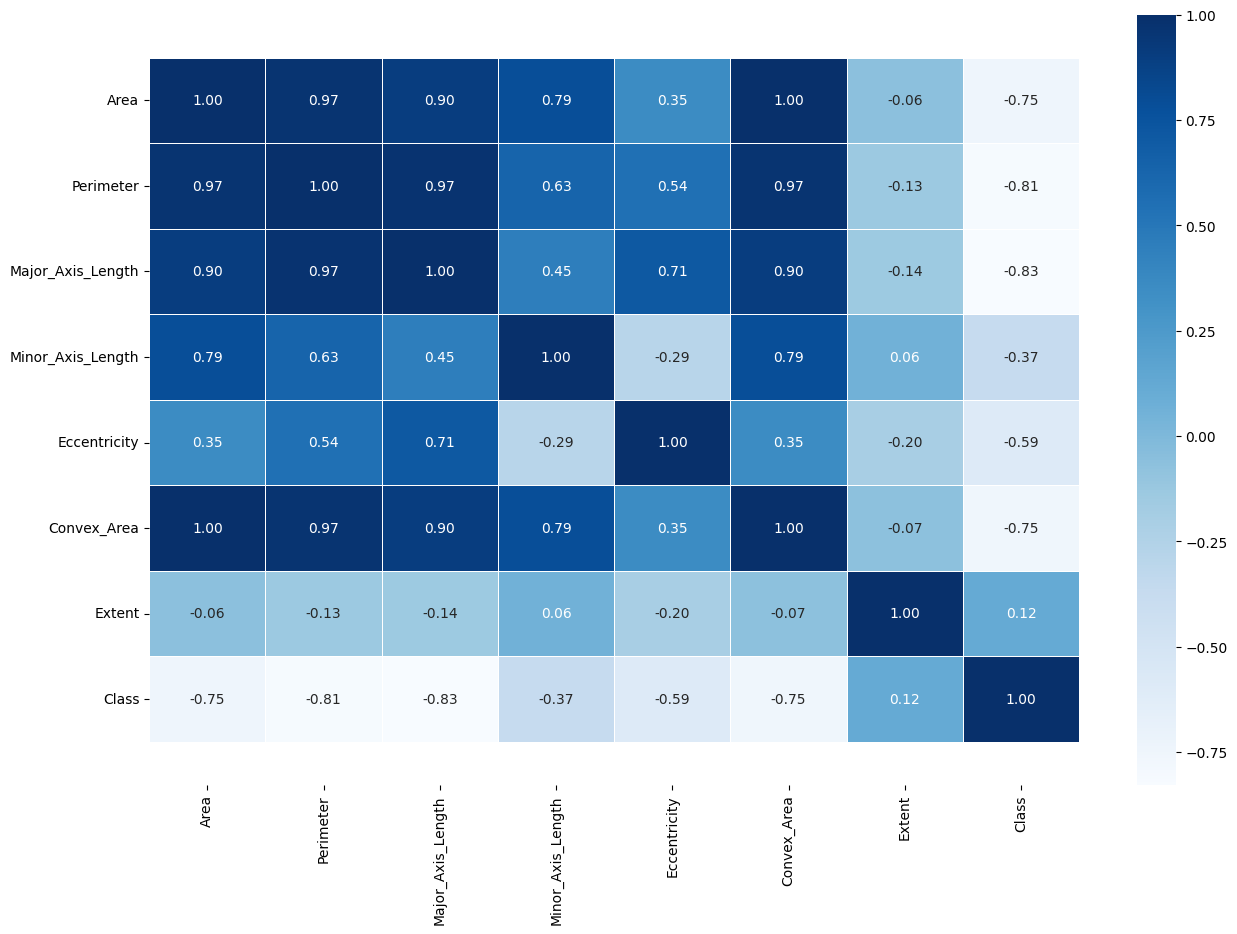

In [16]:
# Correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = ".2f",
                 cmap = "Blues");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

The correlation matrix tells that some features are indeed highly correlated. Some even fully correlated, like area and convex area. Area, perimeter and major axis lenght seem most important features for class determination.

# **3.Data preprocessing**

#### **3.1.Outliers**

In [17]:
# Creating fence list
def fenceList(df):
    feature_list = []
    q1_list = []
    q3_list = []
    iqr_list = []
    low_list = []
    up_list = []
    for col in df.iloc[:, 1:14].columns:
        feature_list.append(col)
        q1 = df[col].quantile(0.25)
        q1_list.append(q1)
        q3 = df[col].quantile(0.75)
        q3_list.append(q3)
        iqr = q3 - q1
        iqr_list.append(iqr)

        lower_fence = q1 - (1.5 * iqr)
        low_list.append(lower_fence)
        upper_fence = q3 + (1.5 * iqr)
        up_list.append(upper_fence)
        
        list_of_lists = [q1_list, q3_list, iqr_list, low_list, up_list]
        fence_list = pd.DataFrame(list_of_lists, index = ["q1", "q2", "iqr", "lowerFence", "upperFence"],
                columns = feature_list)       
    return fence_list

In [18]:
fenceList(df)

Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
q1          426.144753         174.353855          82.731695      0.872402   
q2          483.683746         203.550438          90.143677      0.902588   
iqr          57.538994          29.196583           7.411982      0.030186   
lowerFence  339.836262         130.558981          71.613723      0.827122   
upperFence  569.992237         247.345312         101.261649      0.947868   

            Convex_Area    Extent  Class  
q1            11626.250  0.598862    0.0  
q2            14284.000  0.726562    1.0  
iqr            2657.750  0.127699    1.0  
lowerFence     7639.625  0.407313   -1.5  
upperFence    18270.625  0.918111    2.5

In [19]:
# How many outliers of each feature?
def detectOutliers(df):
    outliers = pd.DataFrame(columns = ["Feature", "Number of Outliers"])
    features = []
    numbers = []
    for col in df.columns:
        features.append(col)
        #Return values at the given quantile
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_fence = q1 - (1.5 * iqr)
        upper_fence = q3 + (1.5 * iqr)
        num_of_out = df.loc[(df[col] < lower_fence) | (df[col] > upper_fence)].shape[0]
        numbers.append(num_of_out)

        lower_fence = df.loc[(df[col] < lower_fence), col]
        upper_fence = df.loc[(df[col] > upper_fence), col] 

    outliers["Feature"] = features
    outliers["Number of Outliers"] = numbers
    
    print("Total number of outliers:", outliers["Number of Outliers"].sum())
    print("Percentage of outliers: % {:.3f}".format(outliers["Number of Outliers"].sum()/df.shape[0]))
    return outliers  

In [20]:
detectOutliers(df.iloc[:, 0:7])

Total number of outliers: 93
Percentage of outliers: % 0.024


Feature  Number of Outliers
0               Area                   4
1          Perimeter                   0
2  Major_Axis_Length                   0
3  Minor_Axis_Length                  65
4       Eccentricity                  21
5        Convex_Area                   3
6             Extent                   0

In [21]:
# Remove outliers
def removeOutliers(df):
    for col in df.iloc[:, 1:14].columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        lower_fence = q1 - (1.5 * iqr)
        upper_fence = q3 + (1.5 * iqr)

        df = df[(df[col] > lower_fence) & (df[col] < upper_fence)]
    return df

In [22]:
df = removeOutliers(df)
df

Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     15231.0  525.578979         229.749878          85.093788      0.928882   
1     14656.0  494.311005         206.020065          91.730972      0.895405   
2     14634.0  501.122009         214.106781          87.768288      0.912118   
3     13176.0  458.342987         193.337387          87.448395      0.891861   
4     14688.0  507.166992         211.743378          89.312454      0.906691   
...       ...         ...                ...                ...           ...   
3804  12501.0  451.799011         192.738800          83.195061      0.902043   
3805  11441.0  415.858002         170.486771          85.756592      0.864280   
3806  11625.0  421.390015         167.714798          89.462570      0.845850   
3807  12437.0  442.498993         183.572922          86.801979      0.881144   
3808   9882.0  392.296997         161.193985          78.210480      0.874406   

      Convex_Area    Extent  Class  
0         15617.0  0.572896      0  
1         15072.0  0.615436      0  
2         14954.0  0.693259      0  
3         13368.0  0.640669      0  
4         15262.0  0.646024      0  
...           ...       ...    ...  
3804      12687.0  0.718820      1  
3805      11628.0  0.681012      1  
3806      11904.0  0.694279      1  
3807      12645.0  0.626739      1  
3808      10097.0  0.659064      1  

[3725 rows x 8 columns]

Now there are 3725 observations without outliers.

#### **3.2.Splitting**

In [23]:
#Split data into X and y
X = df.drop(["Class"], axis=1)
y = df["Class"]

In [24]:
X

Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     15231.0  525.578979         229.749878          85.093788      0.928882   
1     14656.0  494.311005         206.020065          91.730972      0.895405   
2     14634.0  501.122009         214.106781          87.768288      0.912118   
3     13176.0  458.342987         193.337387          87.448395      0.891861   
4     14688.0  507.166992         211.743378          89.312454      0.906691   
...       ...         ...                ...                ...           ...   
3804  12501.0  451.799011         192.738800          83.195061      0.902043   
3805  11441.0  415.858002         170.486771          85.756592      0.864280   
3806  11625.0  421.390015         167.714798          89.462570      0.845850   
3807  12437.0  442.498993         183.572922          86.801979      0.881144   
3808   9882.0  392.296997         161.193985          78.210480      0.874406   

      Convex_Area    Extent  
0         15617.0  0.572896  
1         15072.0  0.615436  
2         14954.0  0.693259  
3         13368.0  0.640669  
4         15262.0  0.646024  
...           ...       ...  
3804      12687.0  0.718820  
3805      11628.0  0.681012  
3806      11904.0  0.694279  
3807      12645.0  0.626739  
3808      10097.0  0.659064  

[3725 rows x 7 columns]

In [25]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3804    1
3805    1
3806    1
3807    1
3808    1
Name: Class, Length: 3725, dtype: int8

In [26]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, stratify = y, random_state = seed)

#### **3.3.Standardization**

In [27]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_trainStandart = scaler.transform(X_train)
X_testStandart = scaler.transform(X_test)

In [28]:
X_trainStandart, len(X_trainStandart)

(array([[-1.13648435, -1.22837468, -1.10202248, ..., -0.51308517,
         -1.15669815, -0.14262513],
        [-0.65026607, -0.63989994, -0.46557554, ...,  0.17188428,
         -0.69039294, -0.58792507],
        [-0.92038734, -0.78756944, -0.84917416, ..., -0.25275539,
         -0.85726866, -0.67252749],
        ...,
        [-0.04385901, -0.26694362, -0.57676252, ..., -1.3063821 ,
         -0.01874774, -0.37195275],
        [ 1.29582106,  0.87635693,  0.82584104, ...,  0.00503567,
          1.2635916 ,  1.63889549],
        [ 1.41965193,  1.53673954,  1.65291959, ...,  1.26066998,
          1.4393437 , -0.80398996]]),
 2235)

In [29]:
X_testStandart, len(X_testStandart)

(array([[-0.4833372 , -0.59564234, -0.7151468 , ..., -0.84149413,
         -0.48327768,  0.98359997],
        [-0.25327886, -0.47684017, -0.64853751, ..., -1.12765052,
         -0.21284432, -0.58897938],
        [ 0.39379814,  0.40103241,  0.23835012, ..., -0.03288473,
          0.43749759,  0.46775735],
        ...,
        [ 1.0256998 ,  1.16111735,  0.94954324, ...,  0.56355329,
          1.10677576, -0.02853514],
        [-0.66362038, -1.03282467, -1.20151552, ..., -1.96279916,
         -0.71524677,  1.926868  ],
        [-0.53189833,  0.05587142,  0.30355852, ...,  1.33748768,
         -0.49629635, -0.08156727]]),
 1490)

# **4.Modelling**

In [30]:
# Classifier comparison with default parameters
scoresCV = []
classifiers = [KNeighborsClassifier(),
               LogisticRegression(random_state = seed),
               RandomForestClassifier(random_state = seed), 
               GradientBoostingClassifier(random_state = seed),
               DecisionTreeClassifier(random_state = seed),
               SVC(random_state = seed),
               XGBClassifier(random_state = seed)
              ]
for classifier in classifiers:
    pipe = make_pipeline(preprocessing.StandardScaler(), classifier)
    scoreCV = cross_val_score(pipe, 
                              X_train, 
                              y_train, 
                              scoring = "accuracy", 
                              cv = StratifiedKFold(n_splits = 5, 
                                                   shuffle = True,
                                                   random_state = seed))
    scoresCV.append([classifier, np.mean(scoreCV)])

In [31]:
# Best classifiers according to validation accuracy descending
c_val = pd.DataFrame(scoresCV, columns=["Classifier", "Validation Accuracy"])
c_val_sort = c_val.sort_values(by = "Validation Accuracy", ignore_index = True)
c_val_sort

Classifier  Validation Accuracy
0            DecisionTreeClassifier(random_state=20)             0.882327
1  XGBClassifier(base_score=None, booster=None, c...             0.913647
2                             KNeighborsClassifier()             0.917226
3        GradientBoostingClassifier(random_state=20)             0.918121
4                               SVC(random_state=20)             0.923490
5                LogisticRegression(random_state=20)             0.924832
6            RandomForestClassifier(random_state=20)             0.924832

#### **4.1.Decision Tree Model**

##### **4.1.1.Parameter Tuning**

In [32]:
# Creating model
clf = DecisionTreeClassifier(random_state = seed)
# For ccp_alpha values
path = clf.cost_complexity_pruning_path(X_train, y_train)
alphas = path["ccp_alphas"]
# Searching parameters
params = {"ccp_alpha": alphas,
          "max_features": np.arange(1,10),
          "max_depth": [3]}          
# Creating grid
dt_clf_grid = RandomizedSearchCV(estimator = clf, 
                                 param_distributions = params,
                                 cv = StratifiedKFold(n_splits = 10, 
                                                      shuffle = True,
                                                      random_state = seed),
                                 verbose = 2, 
                                 scoring = "accuracy",
                                 n_jobs = -1)
# Fit the model
dt_model = dt_clf_grid.fit(X_train, y_train)

# Get best parameters
print("Best parameters for Decision Tree model:", dt_model.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters for Decision Tree model: {'max_features': 6, 'max_depth': 3, 'ccp_alpha': 0.007346791246875248}


In [33]:
# Best parameters
dt_best = pd.DataFrame.from_dict(dt_model.best_params_, orient = "index").rename(columns = {0: "Best"})
dt_best

Best
max_features  6.000000
max_depth     3.000000
ccp_alpha     0.007347

##### **4.1.2.Building model with best parameters**

In [34]:
dt_clf = DecisionTreeClassifier(max_features = int(dt_best.iloc[0,0]),
                                max_depth = int(dt_best.iloc[1,0]),
                                ccp_alpha = dt_best.iloc[2,0],
                                random_state = seed)
# Fit the model
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.007346791246875248, max_depth=3,
                       max_features=6, random_state=20)

##### **4.1.3.Predictions and model accuracy**

In [35]:
dt_pred = dt_clf.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("Decision Tree Model Accuracy:", dt_acc)
dt_acc_tr = dt_clf.score(X_train, y_train)
print("Decision Tree Training Accuracy:", dt_acc_tr)

Decision Tree Model Accuracy: 0.9295302013422819
Decision Tree Training Accuracy: 0.9257270693512304


##### **4.1.4.Other test parameters**

In [36]:
# For comparison list records
dt_roc_auc = roc_auc_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

In [37]:
# Probability estimation
dt_pred_proba = np.array(dt_clf.predict_proba(X_test))
dt_pred_proba

array([[0.03499563, 0.96500437],
       [0.03499563, 0.96500437],
       [0.9261242 , 0.0738758 ],
       ...,
       [0.9261242 , 0.0738758 ],
       [0.03499563, 0.96500437],
       [0.9261242 , 0.0738758 ]])

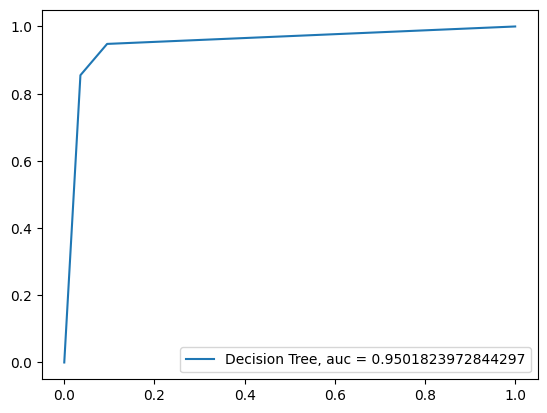

In [38]:
# Roc Curve
fpr, tpr, _ = roc_curve(y_test, dt_pred_proba[:, 1])
auc = roc_auc_score(y_test, dt_pred_proba[:, 1])
plt.plot(fpr, tpr, label = "Decision Tree, auc = " + str(auc))
plt.legend(loc = 4)
plt.show()

Decision Tree Confusion Matrix


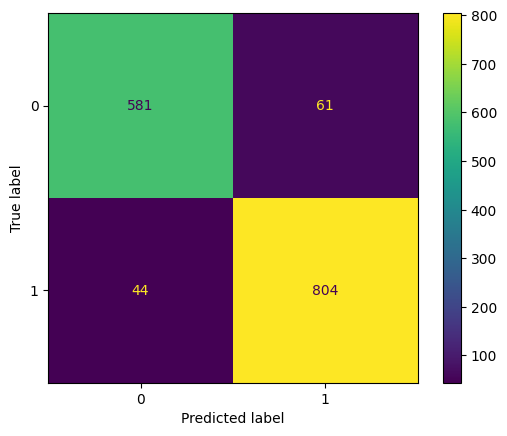

In [39]:
# Confusion matrix
dt_cm = confusion_matrix(y_test, dt_pred, labels = dt_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = dt_cm,
                              display_labels = dt_clf.classes_)
print("Decision Tree Confusion Matrix")
disp.plot()
plt.show()

In [40]:
# Prediction rates
def calculatePredictionRates(model_name, acc, cm):
    print(f"""
    The success rate of the {model_name} model on the test set: {(acc*100):.0f}%
    Cammeo correct prediction rate: {((cm[0][0]/sum(cm[0]))*100):.0f}%
    Osmancik correct prediction rate: {((cm[1][1]/sum(cm[1]))*100):.0f}%""")

In [41]:
calculatePredictionRates("Decision Tree", dt_acc, dt_cm)


    The success rate of the Decision Tree model on the test set: 93%
    Cammeo correct prediction rate: 90%
    Osmancik correct prediction rate: 95%


In [42]:
# Train/Test Performance Metrics
def calculatePerformance(classifier, X_train, y_train, X_test, y_test):
    train_pred = classifier.predict(X_train)
    test_pred = classifier.predict(X_test)
    scores = {
        "Train Accuracy": accuracy_score(y_train, train_pred), 
        "Test Accuracy": accuracy_score(y_test, test_pred),
        "Train Roc_Auc": roc_auc_score(y_train, train_pred),
        "Test Roc_Auc": roc_auc_score(y_test, test_pred),
        "Train Recall": recall_score(y_train, train_pred),
        "Test Recall": recall_score(y_test, test_pred),
        "Train Precision": precision_score(y_train, train_pred), 
        "Test Precision": precision_score(y_test, test_pred), 
        "Train F1": f1_score(y_train, train_pred),
        "Test F1": f1_score(y_test, test_pred) 
    }
    print("Model Performance Metrics")
    return scores

In [43]:
calculatePerformance(dt_clf, X_train, y_train, X_test, y_test)

Model Performance Metrics


{'Train Accuracy': 0.9257270693512304,
 'Test Accuracy': 0.9295302013422819,
 'Train Roc_Auc': 0.922482864156077,
 'Test Roc_Auc': 0.9265488156115912,
 'Train Recall': 0.9457973291437549,
 'Test Recall': 0.9481132075471698,
 'Train Precision': 0.9254419677171407,
 'Test Precision': 0.9294797687861271,
 'Train F1': 0.9355089355089357,
 'Test F1': 0.9387040280210158}

In [44]:
# Creating comparison lists
metrics = ["Accuracy", "Roc Auc", "Precision", "Recall", "F1 Score"]
model_names = []
clf_list = []
pred_list = []
pred_proba_list = []
acc_list = []
cm_list = []
f1_list = []
prec_list = []
recall_list = []
roc_auc_list = []
tr_acc_list = []
# Updating comparison lists
def updateLists(model_name, clf, pred, pred_proba, acc, cm, f1, prec, recall, roc_auc, acc_tr):
    model_names.append(model_name) 
    clf_list.append(clf)
    pred_list.append(pred)
    pred_proba_list.append(pred_proba)
    acc_list.append(acc)
    cm_list.append(cm)
    f1_list.append(f1)
    prec_list.append(prec)
    recall_list.append(recall)
    roc_auc_list.append(roc_auc)
    tr_acc_list.append(acc_tr)

In [45]:
updateLists("DecisionTree", dt_clf, dt_pred, dt_pred_proba, dt_acc, dt_cm, dt_f1, dt_prec, dt_recall, dt_roc_auc, dt_acc_tr)

##### **4.1.5.Feature Importances**

In [46]:
# Ploting the impurity-based feature importances
feats = {} # a dictionary to hold feature_name: feature_importance
importances = dt_clf.feature_importances_
dt_clf.feature_importances_

array([0., 0., 1., 0., 0., 0., 0.])

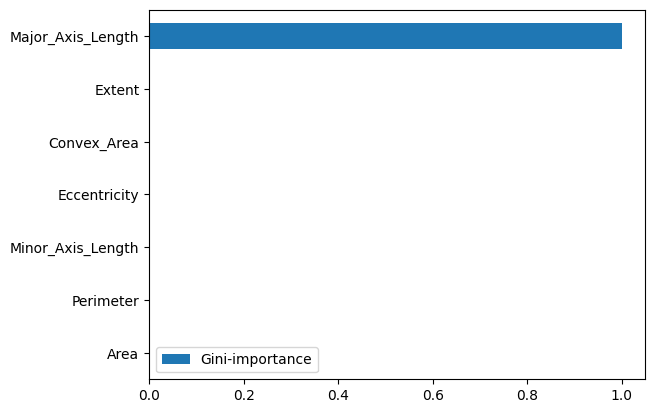

In [47]:
for feature, importance in zip(X.columns, dt_clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient = "index").rename(columns = {0: "Gini-importance"})
importances = importances.sort_values(by = "Gini-importance")
importances.plot.barh();

#### **4.2.XGB Classifier**

##### **4.2.1.Parameter Tuning**

In [48]:
# Creating model
clf = XGBClassifier(random_state = seed)
# Searching parameters
params = {"n_estimators": [50, 100, 500, 1000],
          "learning_rate": [1, 0.1, 0.01, 0.001],
          "gamma": [1, 0.1, 0.01, 0.001]
         }
# Creating grid
xg_clf_grid = RandomizedSearchCV(estimator = clf, 
                                 param_distributions = params,
                                 cv = StratifiedKFold(n_splits = 5, 
                                                      shuffle = True,
                                                      random_state = seed),
                                 verbose = 2, 
                                 scoring = "accuracy",
                                 n_jobs = -1)
# Fit the model
xg_model = xg_clf_grid.fit(X_train, y_train)

# Get best parameters
print("Best parameters for XGB model: ", xg_model.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for XGB model:  {'n_estimators': 50, 'learning_rate': 0.1, 'gamma': 1}


In [49]:
# Best parameters
xg_best = pd.DataFrame.from_dict(xg_model.best_params_, orient = "index").rename(columns = {0: "Best"})
xg_best

Best
n_estimators   50.0
learning_rate   0.1
gamma           1.0

##### **4.2.2.Building model with best parameters**

In [50]:
xg_clf = XGBClassifier(n_estimators = int(xg_best.iloc[0,0]), 
                       learning_rate = float(xg_best.iloc[1,0]),
                       gamma = float(xg_best.iloc[2,0]),
                       random_state = seed)
# Fit the model
xg_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=20, ...)

##### **4.2.3.Predictions and model accuracy**

In [51]:
xg_pred = xg_clf.predict(X_test)
xg_acc = accuracy_score(y_test, xg_pred)
print("XGB Model Accuracy:", xg_acc)
xg_acc_tr = xg_clf.score(X_train, y_train)
print("XGB Training Accuracy:", xg_acc_tr)

XGB Model Accuracy: 0.9268456375838926
XGB Training Accuracy: 0.9642058165548099


##### **4.2.4.Other test parameters**

In [52]:
# Classification Report
print("XGB Classification Report\n\n", classification_report(y_test, xg_pred))

XGB Classification Report

               precision    recall  f1-score   support

           0       0.91      0.92      0.92       642
           1       0.94      0.94      0.94       848

    accuracy                           0.93      1490
   macro avg       0.93      0.93      0.93      1490
weighted avg       0.93      0.93      0.93      1490



In [53]:
# For comparison list records
xg_roc_auc = roc_auc_score(y_test, xg_pred)
xg_recall = recall_score(y_test, xg_pred)
xg_prec = precision_score(y_test, xg_pred)
xg_f1 = f1_score(y_test, xg_pred)

In [54]:
# Probability estimation
xg_pred_proba = np.array(xg_clf.predict_proba(X_test))
xg_pred_proba

array([[0.0054912 , 0.9945088 ],
       [0.00888222, 0.9911178 ],
       [0.7943454 , 0.20565465],
       ...,
       [0.98048395, 0.01951604],
       [0.00509089, 0.9949091 ],
       [0.89912504, 0.10087497]], dtype=float32)

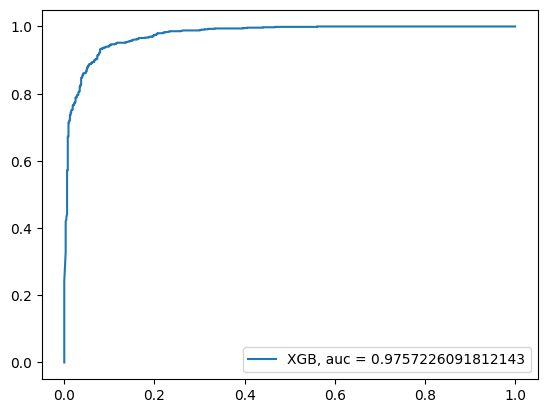

In [55]:
# Roc Curve
fpr, tpr, _ = roc_curve(y_test, xg_pred_proba[:, 1])
auc = roc_auc_score(y_test, xg_pred_proba[:, 1])
plt.plot(fpr, tpr, label = "XGB, auc = " + str(auc))
plt.legend(loc = 4)
plt.show()

XGB Confusion Matrix


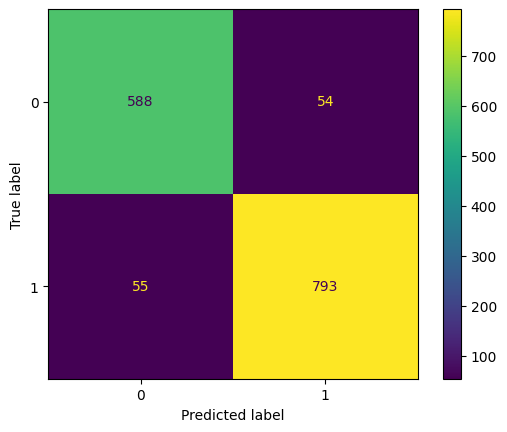

In [56]:
# Confusion matrix
xg_cm = confusion_matrix(y_test, xg_pred, labels = xg_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = xg_cm,
                              display_labels = xg_clf.classes_)
print("XGB Confusion Matrix")
disp.plot()
plt.show();

In [57]:
# Prediction rates
calculatePredictionRates("XGB", xg_acc, xg_cm)


    The success rate of the XGB model on the test set: 93%
    Cammeo correct prediction rate: 92%
    Osmancik correct prediction rate: 94%


In [58]:
#Train/Test Performance Metrics
calculatePerformance(xg_clf, X_train, y_train, X_test, y_test)

Model Performance Metrics


{'Train Accuracy': 0.9642058165548099,
 'Test Accuracy': 0.9268456375838926,
 'Train Roc_Auc': 0.962610217323493,
 'Test Roc_Auc': 0.9255146799506261,
 'Train Recall': 0.974076983503535,
 'Test Recall': 0.9351415094339622,
 'Train Precision': 0.9634809634809635,
 'Test Precision': 0.9362455726092089,
 'Train F1': 0.9687500000000001,
 'Test F1': 0.935693215339233}

In [59]:
# Updating comparison lists
updateLists("XGB", xg_clf, xg_pred, xg_pred_proba, xg_acc, xg_cm, xg_f1, xg_prec, xg_recall, xg_roc_auc, xg_acc_tr)

##### **4.2.5.Feature Importances**

In [60]:
# Ploting the impurity-based feature importances
feats = {} # a dictionary to hold feature_name: feature_importance
importances = xg_clf.feature_importances_
xg_clf.feature_importances_

array([0.03418111, 0.04267779, 0.77353656, 0.04092189, 0.03606301,
       0.0352129 , 0.03740671], dtype=float32)

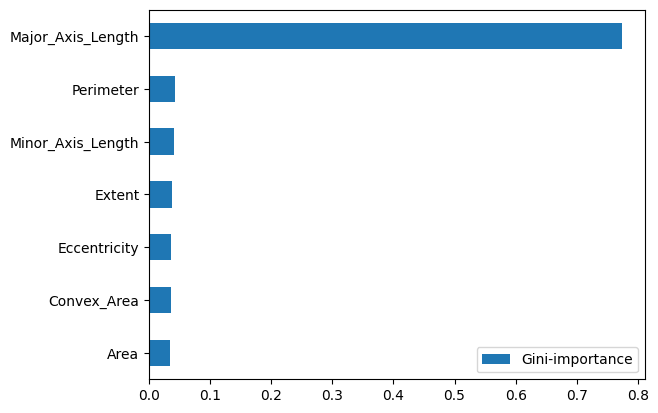

In [61]:
for feature, importance in zip(X.columns, xg_clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient = "index").rename(columns = {0: "Gini-importance"})
importances = importances.sort_values(by = "Gini-importance")
importances.plot.barh();

##### **4.3.SVC Model**

##### **4.3.1.Parameter Tuning**

In [62]:
# Creating model pipeline
pipe = Pipeline([("scaler", preprocessing.StandardScaler()),
                 ("Classifier", SVC(random_state = seed))])
# Searching parameters
params = [{"Classifier__kernel": ["rbf", "linear"], 
           "Classifier__gamma": [1, 0.1, 0.01, 0.001],
           "Classifier__C": [1, 10, 100, 1000]}
         ]
# Creating grid
svc_clf_grid = RandomizedSearchCV(estimator = pipe, 
                                  param_distributions = params,
                                  cv = StratifiedKFold(n_splits = 10, 
                                                       shuffle = True,
                                                       random_state = seed),
                                  n_iter = 10,
                                  verbose = 2, 
                                  scoring = "accuracy",
                                  n_jobs = -1)
# Fit the model
svc_model = svc_clf_grid.fit(X_trainStandart, y_train)

# Get best parameters
print("Best parameters for SVC model: ", svc_model.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters for SVC model:  {'Classifier__kernel': 'linear', 'Classifier__gamma': 0.01, 'Classifier__C': 1}


In [63]:
# Best parameters
svc_best = pd.DataFrame.from_dict(svc_model.best_params_, orient = "index").rename(columns = {0: "Best"})
svc_best

Best
Classifier__kernel  linear
Classifier__gamma     0.01
Classifier__C            1

##### **4.3.2.Building model with best parameters**

In [64]:
svc_clf = SVC(kernel = svc_best.iloc[0,0], 
              gamma = float(svc_best.iloc[1,0]),
              C = float(svc_best.iloc[2,0]),
              random_state = seed,
              probability = True)
# Fit the model
svc_clf.fit(X_trainStandart, y_train)

SVC(gamma=0.01, kernel='linear', probability=True, random_state=20)

##### **4.3.3.Predictions and model accuracy**

In [65]:
svc_model = svc_clf.fit(X_trainStandart, y_train)
svc_pred = svc_clf.predict(X_testStandart)
svc_acc = accuracy_score(y_test, svc_pred)
print("SVC Model Accuracy:", svc_acc)
svc_acc_tr = svc_clf.score(X_trainStandart, y_train)
print("SVC Training Accuracy:", svc_acc_tr)

SVC Model Accuracy: 0.9281879194630872
SVC Training Accuracy: 0.9257270693512304


##### **4.3.4.Other test parameters**

In [66]:
# Classification Report
print("SVC Classification Report\n\n", classification_report(y_test, svc_pred))

SVC Classification Report

               precision    recall  f1-score   support

           0       0.91      0.92      0.92       642
           1       0.94      0.93      0.94       848

    accuracy                           0.93      1490
   macro avg       0.93      0.93      0.93      1490
weighted avg       0.93      0.93      0.93      1490



In [67]:
#  For comparison list records
svc_roc_auc = roc_auc_score(y_test, svc_pred)
svc_recall = recall_score(y_test, svc_pred)
svc_prec = precision_score(y_test, svc_pred)
svc_f1 = f1_score(y_test, svc_pred)

In [68]:
# Probability estimation
svc_pred_proba = np.array(svc_clf.predict_proba(X_testStandart))
svc_pred_proba

array([[2.00308517e-02, 9.79969148e-01],
       [2.49735856e-02, 9.75026414e-01],
       [6.36984835e-01, 3.63015165e-01],
       ...,
       [9.80979514e-01, 1.90204858e-02],
       [4.73411739e-06, 9.99995266e-01],
       [6.43410939e-01, 3.56589061e-01]])

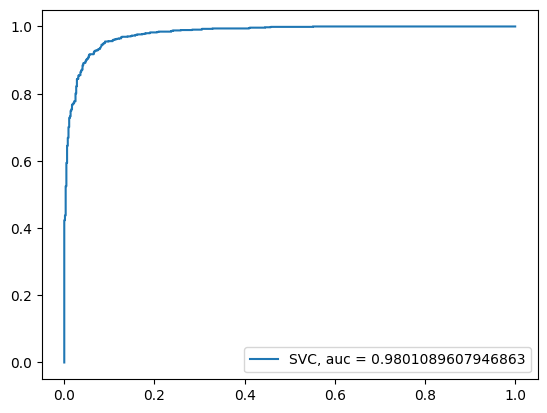

In [69]:
# Roc Curve
fpr, tpr, _ = roc_curve(y_test, svc_pred_proba[:, 1])
auc = roc_auc_score(y_test, svc_pred_proba[:, 1])
plt.plot(fpr, tpr, label = "SVC, auc = " + str(auc))
plt.legend(loc = 4)
plt.show()

SVC Confusion Matrix


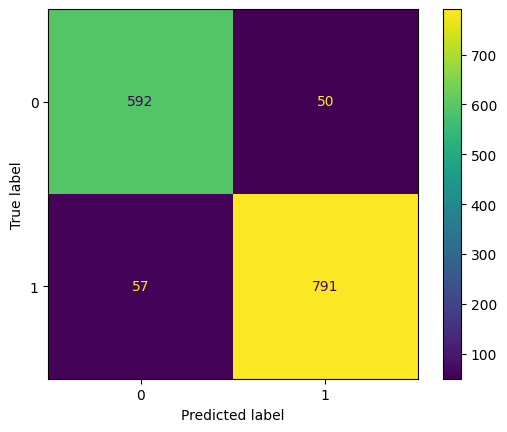

In [70]:
# Confusion matrix
svc_cm = confusion_matrix(y_test, svc_pred, labels = svc_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = svc_cm,
                              display_labels = svc_clf.classes_)
print("SVC Confusion Matrix")
disp.plot()
plt.show();

In [71]:
# Prediction rates
calculatePredictionRates("SVC", svc_acc, svc_cm)


    The success rate of the SVC model on the test set: 93%
    Cammeo correct prediction rate: 92%
    Osmancik correct prediction rate: 93%


In [72]:
#Train/Test Performance Metrics
calculatePerformance(svc_clf, X_trainStandart, y_train, X_testStandart, y_test)

Model Performance Metrics


{'Train Accuracy': 0.9257270693512304,
 'Test Accuracy': 0.9281879194630872,
 'Train Roc_Auc': 0.9242605497515158,
 'Test Roc_Auc': 0.9274506994651149,
 'Train Recall': 0.9347996857816182,
 'Test Recall': 0.9327830188679245,
 'Train Precision': 0.9347996857816182,
 'Test Precision': 0.9405469678953626,
 'Train F1': 0.9347996857816182,
 'Test F1': 0.9366489046773239}

In [73]:
# Updating comparison lists
updateLists("SVC", svc_clf, svc_pred, svc_pred_proba, svc_acc, svc_cm, svc_f1, svc_prec, svc_recall, svc_roc_auc, svc_acc_tr)

#### **4.4.Logistic Regression Model**

##### **4.4.1.Parameter Tuning**

In [74]:
# Creating pipeline
pipe = Pipeline([("scaler", preprocessing.StandardScaler()),
                 ("Classifier", LogisticRegression(max_iter = 1000, random_state = seed))])
# Searching parameters
params = [{"Classifier__solver": ["liblinear"], 
           "Classifier__penalty": ["l1", "l2"],
           "Classifier__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}]
# Creating grid
lr_clf_grid = GridSearchCV(estimator = pipe,
                           param_grid = params,
                           cv = StratifiedKFold(n_splits = 10, 
                                                shuffle = True,
                                                random_state = seed),
                           refit = True,
                           verbose = 2,
                           scoring = "accuracy")
# Fit the model
lr_model = lr_clf_grid.fit(X_trainStandart, y_train)

# Get best parameters
print("Best parameters for Logistic Regression model: ", lr_model.best_params_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END Classifier__C=0.001, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END C

In [75]:
# Best parameters
lr_best = pd.DataFrame.from_dict(lr_model.best_params_, orient = "index").rename(columns = {0: "Best"})
lr_best

Best
Classifier__C               10
Classifier__penalty         l1
Classifier__solver   liblinear

##### **4.4.2.Building model with best parameters**

In [76]:
lr_clf = LogisticRegression(C = float(lr_best.iloc[0,0]),
                            penalty = lr_best.iloc[1,0],
                            solver = lr_best.iloc[2,0],
                            max_iter = 1000, 
                            random_state = seed)
# Fitting the model
lr_clf.fit(X_train, y_train)

LogisticRegression(C=10.0, max_iter=1000, penalty='l1', random_state=20,
                   solver='liblinear')

##### **4.4.3.Predictions and model accuracy**

In [77]:
lr_pred = lr_clf.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print("Logistic Regression Model Accuracy:", lr_acc)
lr_acc_tr = lr_clf.score(X_train, y_train)
print("Logistic Regression Training Accuracy:", lr_acc_tr)

Logistic Regression Model Accuracy: 0.9328859060402684
Logistic Regression Training Accuracy: 0.9275167785234899


##### **4.4.4.Other test parameters**

In [78]:
# Classification Report
print("Logistic Regression Classification Report\n\n", classification_report(y_test, lr_pred))

Logistic Regression Classification Report

               precision    recall  f1-score   support

           0       0.92      0.92      0.92       642
           1       0.94      0.94      0.94       848

    accuracy                           0.93      1490
   macro avg       0.93      0.93      0.93      1490
weighted avg       0.93      0.93      0.93      1490



In [79]:
# For comparison list records
lr_roc_auc = roc_auc_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_prec = precision_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

In [80]:
# Probability estimation
lr_pred_proba = np.array(lr_clf.predict_proba(X_test))
lr_pred_proba

array([[1.73200679e-02, 9.82679932e-01],
       [3.98102362e-02, 9.60189764e-01],
       [6.78227494e-01, 3.21772506e-01],
       ...,
       [9.90178748e-01, 9.82125235e-03],
       [9.70382227e-04, 9.99029618e-01],
       [6.25835498e-01, 3.74164502e-01]])

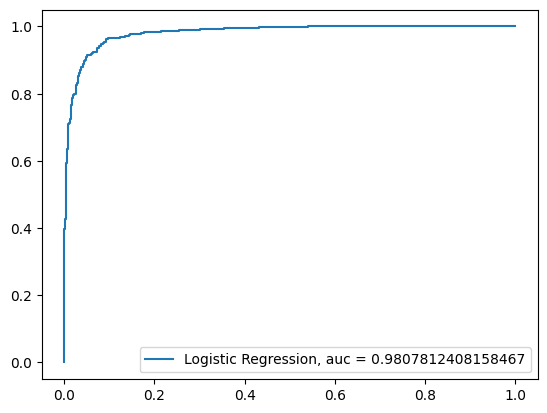

In [81]:
# Roc Curve
fpr, tpr, _ = roc_curve(y_test, lr_pred_proba[:, 1])
auc = roc_auc_score(y_test, lr_pred_proba[:, 1])
plt.plot(fpr, tpr, label = "Logistic Regression, auc = " + str(auc))
plt.legend(loc = 4)
plt.show()

Logistic Regression Confusion Matrix


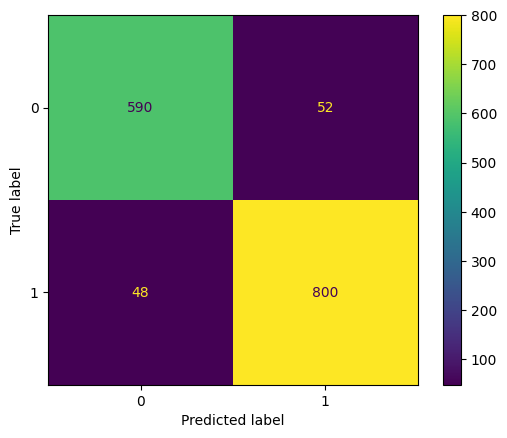

In [82]:
#Confusion matrix
lr_cm = confusion_matrix(y_test, lr_pred, labels = lr_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = lr_cm,
                              display_labels = lr_clf.classes_)
print("Logistic Regression Confusion Matrix")
disp.plot()
plt.show()

In [83]:
# Prediction rates
calculatePredictionRates("Logistic Regression", lr_acc, lr_cm)


    The success rate of the Logistic Regression model on the test set: 93%
    Cammeo correct prediction rate: 92%
    Osmancik correct prediction rate: 94%


In [84]:
# Train/Test Performance Metrics
calculatePerformance(lr_clf, X_train, y_train, X_test, y_test)

Model Performance Metrics


{'Train Accuracy': 0.9275167785234899,
 'Test Accuracy': 0.9328859060402684,
 'Train Roc_Auc': 0.92557768657533,
 'Test Roc_Auc': 0.9311996708399459,
 'Train Recall': 0.9395129615082483,
 'Test Recall': 0.9433962264150944,
 'Train Precision': 0.9336455893832943,
 'Test Precision': 0.9389671361502347,
 'Train F1': 0.9365700861393892,
 'Test F1': 0.9411764705882354}

In [85]:
# Updating comparison lists
updateLists("LogisticRegression", lr_clf, lr_pred, lr_pred_proba, lr_acc, lr_cm, lr_f1, lr_prec, lr_recall, lr_roc_auc, lr_acc_tr)

#### **4.5.Random Forest Model**

##### **4.5.1.Parameter Tuning**

In [86]:
# Creating model
clf = RandomForestClassifier(random_state = seed)
# Searching parameters
params = {"n_estimators": [100, 200, 300, 400, 500],
          "max_features": np.arange(1,8),
          "max_depth": [3]
         }
# Creating grid
rf_clf_grid = RandomizedSearchCV(estimator = clf, 
                                 param_distributions = params,
                                 cv = StratifiedKFold(n_splits = 10, 
                                                      shuffle = True,
                                                      random_state = seed),
                                 n_iter = 10,
                                 verbose = 2, 
                                 scoring = "accuracy",
                                 n_jobs = -1)
# Fit the model
rf_model = rf_clf_grid.fit(X_train, y_train)

# Get best parameters
print("Best parameters for Random Forest model: ", rf_model.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ccp_alpha=0.00039771314939100174, max_depth=3, max_features=7; total time=   0.0s
[CV] END ccp_alpha=0.00039771314939100174, max_depth=3, max_features=7; total time=   0.0s
[CV] END ccp_alpha=0.00039771314939100174, max_depth=3, max_features=7; total time=   0.0s
[CV] END ccp_alpha=0.00039771314939100174, max_depth=3, max_features=7; total time=   0.0s
[CV] END ccp_alpha=0.00039771314939100174, max_depth=3, max_features=7; total time=   0.0s
[CV] END ccp_alpha=0.00039771314939100174, max_depth=3, max_features=7; total time=   0.0s
[CV] END ccp_alpha=0.0013756195990700531, max_depth=3, max_features=7; total time=   0.0s
[CV] END ccp_alpha=0.0013756195990700531, max_depth=3, max_features=7; total time=   0.0s
[CV] END ccp_alpha=0.0013756195990700531, max_depth=3, max_features=7; total time=   0.0s
[CV] END ccp_alpha=0.0005857230018303844, max_depth=3, max_features=3; total time=   0.0s
[CV] END ccp_alpha=0.0005857230

In [87]:
# Best paramaeters
rf_best = pd.DataFrame.from_dict(rf_model.best_params_, orient = "index").rename(columns = {0: "Best"})
rf_best

Best
n_estimators   400
max_features     6
max_depth        3

##### **4.5.2.Building model with best parameters**

In [88]:
rf_clf = RandomForestClassifier(n_estimators = int(rf_best.iloc[0,0]),
                                max_features = int(rf_best.iloc[1,0]),
                                max_depth = int(rf_best.iloc[2,0]),
                                random_state = seed)
# Fit the model
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=6, n_estimators=400,
                       random_state=20)

##### **4.5.3.Predictions and model accuracy**

In [89]:
rf_pred = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Model Accuracy:", rf_acc)
rf_acc_tr = rf_clf.score(X_train, y_train)
print("Random Forest Training Accuracy:", rf_acc_tr)

Random Forest Model Accuracy: 0.9302013422818792
Random Forest Training Accuracy: 0.9284116331096197


##### **4.5.4.Other test parameters**

In [90]:
# Classification Report
print("Random Forest Classification Report\n\n", classification_report(y_test, rf_pred))

Random Forest Classification Report

               precision    recall  f1-score   support

           0       0.92      0.91      0.92       642
           1       0.93      0.94      0.94       848

    accuracy                           0.93      1490
   macro avg       0.93      0.93      0.93      1490
weighted avg       0.93      0.93      0.93      1490



In [91]:
# For comparison list records
rf_roc_auc = roc_auc_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

In [92]:
# Probability estimation
rf_pred_proba = np.array(rf_clf.predict_proba(X_test))
rf_pred_proba

array([[0.01086713, 0.98913287],
       [0.01156003, 0.98843997],
       [0.73161231, 0.26838769],
       ...,
       [0.98230592, 0.01769408],
       [0.01076196, 0.98923804],
       [0.74261032, 0.25738968]])

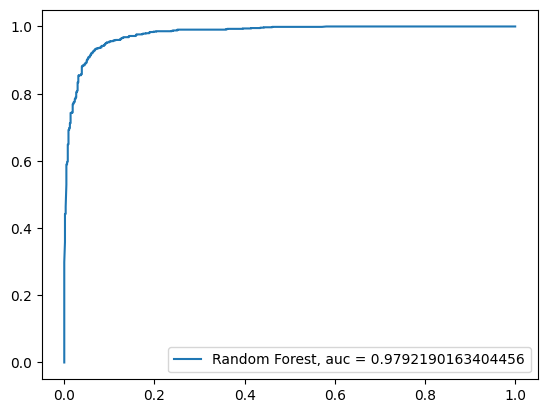

In [93]:
# Roc Curve
fpr, tpr, _ = roc_curve(y_test, rf_pred_proba[:, 1])
auc = roc_auc_score(y_test, rf_pred_proba[:, 1])
plt.plot(fpr, tpr, label = "Random Forest, auc = " + str(auc))
plt.legend(loc = 4)
plt.show()

Random Forest Confusion Matrix


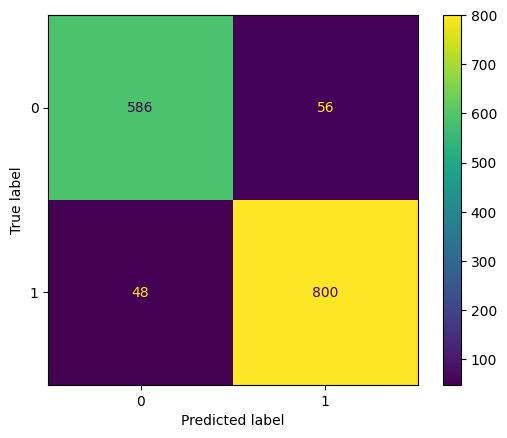

In [94]:
# Confusion matrix
rf_cm = confusion_matrix(y_test, rf_pred, labels = rf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = rf_cm,
                              display_labels = rf_clf.classes_)
print("Random Forest Confusion Matrix")
disp.plot()
plt.show()

In [95]:
# Prediction rates
calculatePredictionRates("Random Forest", rf_acc, rf_cm)


    The success rate of the Random Forest model on the test set: 93%
    Cammeo correct prediction rate: 91%
    Osmancik correct prediction rate: 94%


In [96]:
# Train/Test Performance Metrics
calculatePerformance(rf_clf, X_train, y_train, X_test, y_test)

Model Performance Metrics


{'Train Accuracy': 0.9284116331096197,
 'Test Accuracy': 0.9302013422818792,
 'Train Roc_Auc': 0.9263632325297684,
 'Test Roc_Auc': 0.9280844060424381,
 'Train Recall': 0.9410840534171249,
 'Test Recall': 0.9433962264150944,
 'Train Precision': 0.9337490257209665,
 'Test Precision': 0.9345794392523364,
 'Train F1': 0.9374021909233177,
 'Test F1': 0.9389671361502347}

In [97]:
# Updating comparison lists
updateLists("RandomForest", rf_clf, rf_pred, rf_pred_proba, rf_acc, rf_cm, rf_f1, rf_prec, rf_recall, rf_roc_auc, rf_acc_tr)

#### **4.5.5.Feature Importances**

In [98]:
# Ploting the impurity-based feature importances
feats = {} # a dictionary to hold feature_name: feature_importance
importances = rf_clf.feature_importances_
rf_clf.feature_importances_

array([0.00329772, 0.14817928, 0.83547109, 0.00142635, 0.00468795,
       0.00348517, 0.00345244])

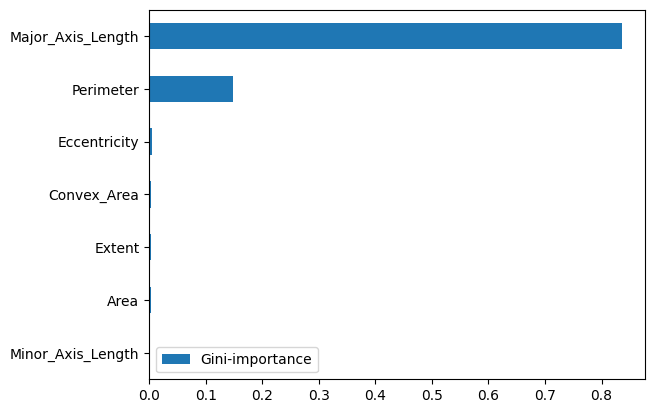

In [99]:
for feature, importance in zip(X.columns, rf_clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient = "index").rename(columns = {0: "Gini-importance"})
importances = importances.sort_values(by = "Gini-importance")
importances.plot.barh();

#### **4.6.Deep Learning Model**

##### **4.6.1.Building the model**

In [100]:
# Model creation
dl_clf = keras.Sequential()
# Metrics
mdl_metrics = [keras.metrics.BinaryAccuracy(name = "accuracy"),
              keras.metrics.AUC(name = "roc_auc")]
# Layers
dl_clf.add(layers.Dense(128, activation = "relu", input_shape = (X_trainStandart.shape[1], ) ))
dl_clf.add(layers.Dense(64, activation = "relu"))
dl_clf.add(layers.Dense(1, activation = "sigmoid"))
# Compile
dl_clf.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = mdl_metrics)
# Training
dl_hist = dl_clf.fit(X_trainStandart, 
                     y_train, 
                     validation_data = (X_testStandart, y_test),
                     epochs = 100)

Epoch 1/100
70/70 [==============================] - 2s 8ms/step - loss: 0.2851 - accuracy: 0.9092 - roc_auc: 0.9601 - val_loss: 0.1891 - val_accuracy: 0.9255 - val_roc_auc: 0.9791
Epoch 2/100
70/70 [==============================] - 0s 3ms/step - loss: 0.1948 - accuracy: 0.9235 - roc_auc: 0.9765 - val_loss: 0.1828 - val_accuracy: 0.9262 - val_roc_auc: 0.9788
Epoch 3/100
70/70 [==============================] - 0s 3ms/step - loss: 0.1915 - accuracy: 0.9253 - roc_auc: 0.9775 - val_loss: 0.1905 - val_accuracy: 0.9221 - val_roc_auc: 0.9785
Epoch 4/100
70/70 [==============================] - 0s 3ms/step - loss: 0.1919 - accuracy: 0.9248 - roc_auc: 0.9771 - val_loss: 0.1863 - val_accuracy: 0.9282 - val_roc_auc: 0.9781
Epoch 5/100
70/70 [==============================] - 0s 3ms/step - loss: 0.1903 - accuracy: 0.9262 - roc_auc: 0.9774 - val_loss: 0.1843 - val_accuracy: 0.9302 - val_roc_auc: 0.9782
Epoch 6/100
70/70 [==============================] - 0s 3ms/step - loss: 0.1885 - accuracy: 0.9

##### **4.6.2.Predictions and model accuracy**

In [101]:
dl_pred_proba = dl_clf.predict(X_testStandart)
dl_pred = (dl_pred_proba > 0.5).astype("int")
dl_acc = dl_clf.evaluate(X_testStandart, y_test)[1]
print("Deep Learning Model Accuracy:", dl_acc)
dl_acc_tr = dl_clf.evaluate(X_trainStandart, y_train)[1]
print("Deep Learning Training Accuracy:", dl_acc_tr)

47/47 [==============================] - 0s 2ms/step - loss: 0.1974 - accuracy: 0.9262 - roc_auc: 0.9756
Deep Learning Model Accuracy: 0.926174521446228
70/70 [==============================] - 0s 1ms/step - loss: 0.1593 - accuracy: 0.9365 - roc_auc: 0.9846
Deep Learning Training Accuracy: 0.936465322971344


##### **4.6.4.Other test parameters**

In [102]:
# Classification Report
print("Deep Learning Classification Report\n\n", classification_report(y_test, dl_pred))

Deep Learning Classification Report

               precision    recall  f1-score   support

           0       0.91      0.92      0.91       642
           1       0.94      0.93      0.94       848

    accuracy                           0.93      1490
   macro avg       0.92      0.92      0.92      1490
weighted avg       0.93      0.93      0.93      1490



In [103]:
# For comparison list recordings
dl_roc_auc = roc_auc_score(y_test, dl_pred)
dl_recall = recall_score(y_test, dl_pred)
dl_prec = precision_score(y_test, dl_pred)
dl_f1 = f1_score(y_test, dl_pred)

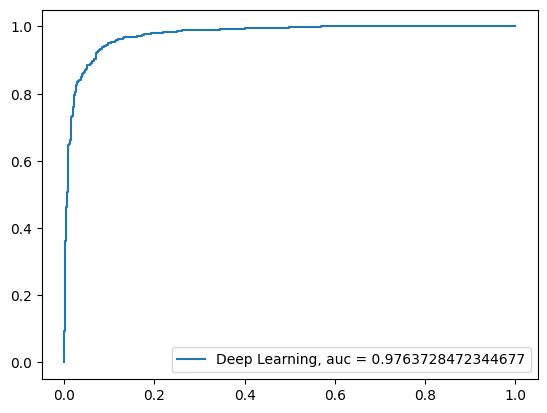

In [104]:
# Roc Curve
fpr, tpr, _ = roc_curve(y_test, dl_pred_proba[:, 0])
auc = roc_auc_score(y_test, dl_pred_proba[:, 0])
plt.plot(fpr, tpr, label = "Deep Learning, auc = " + str(auc))
plt.legend(loc = 4)
plt.show()

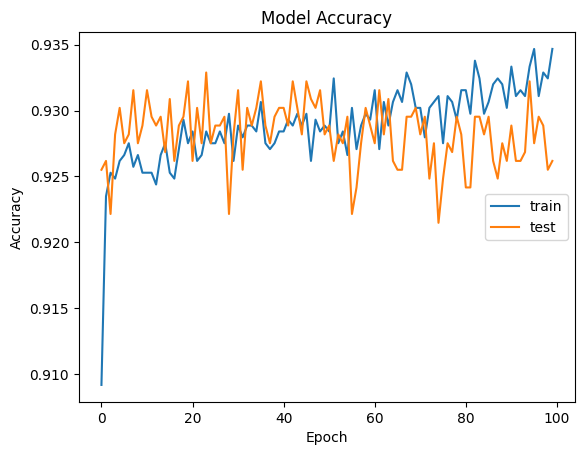

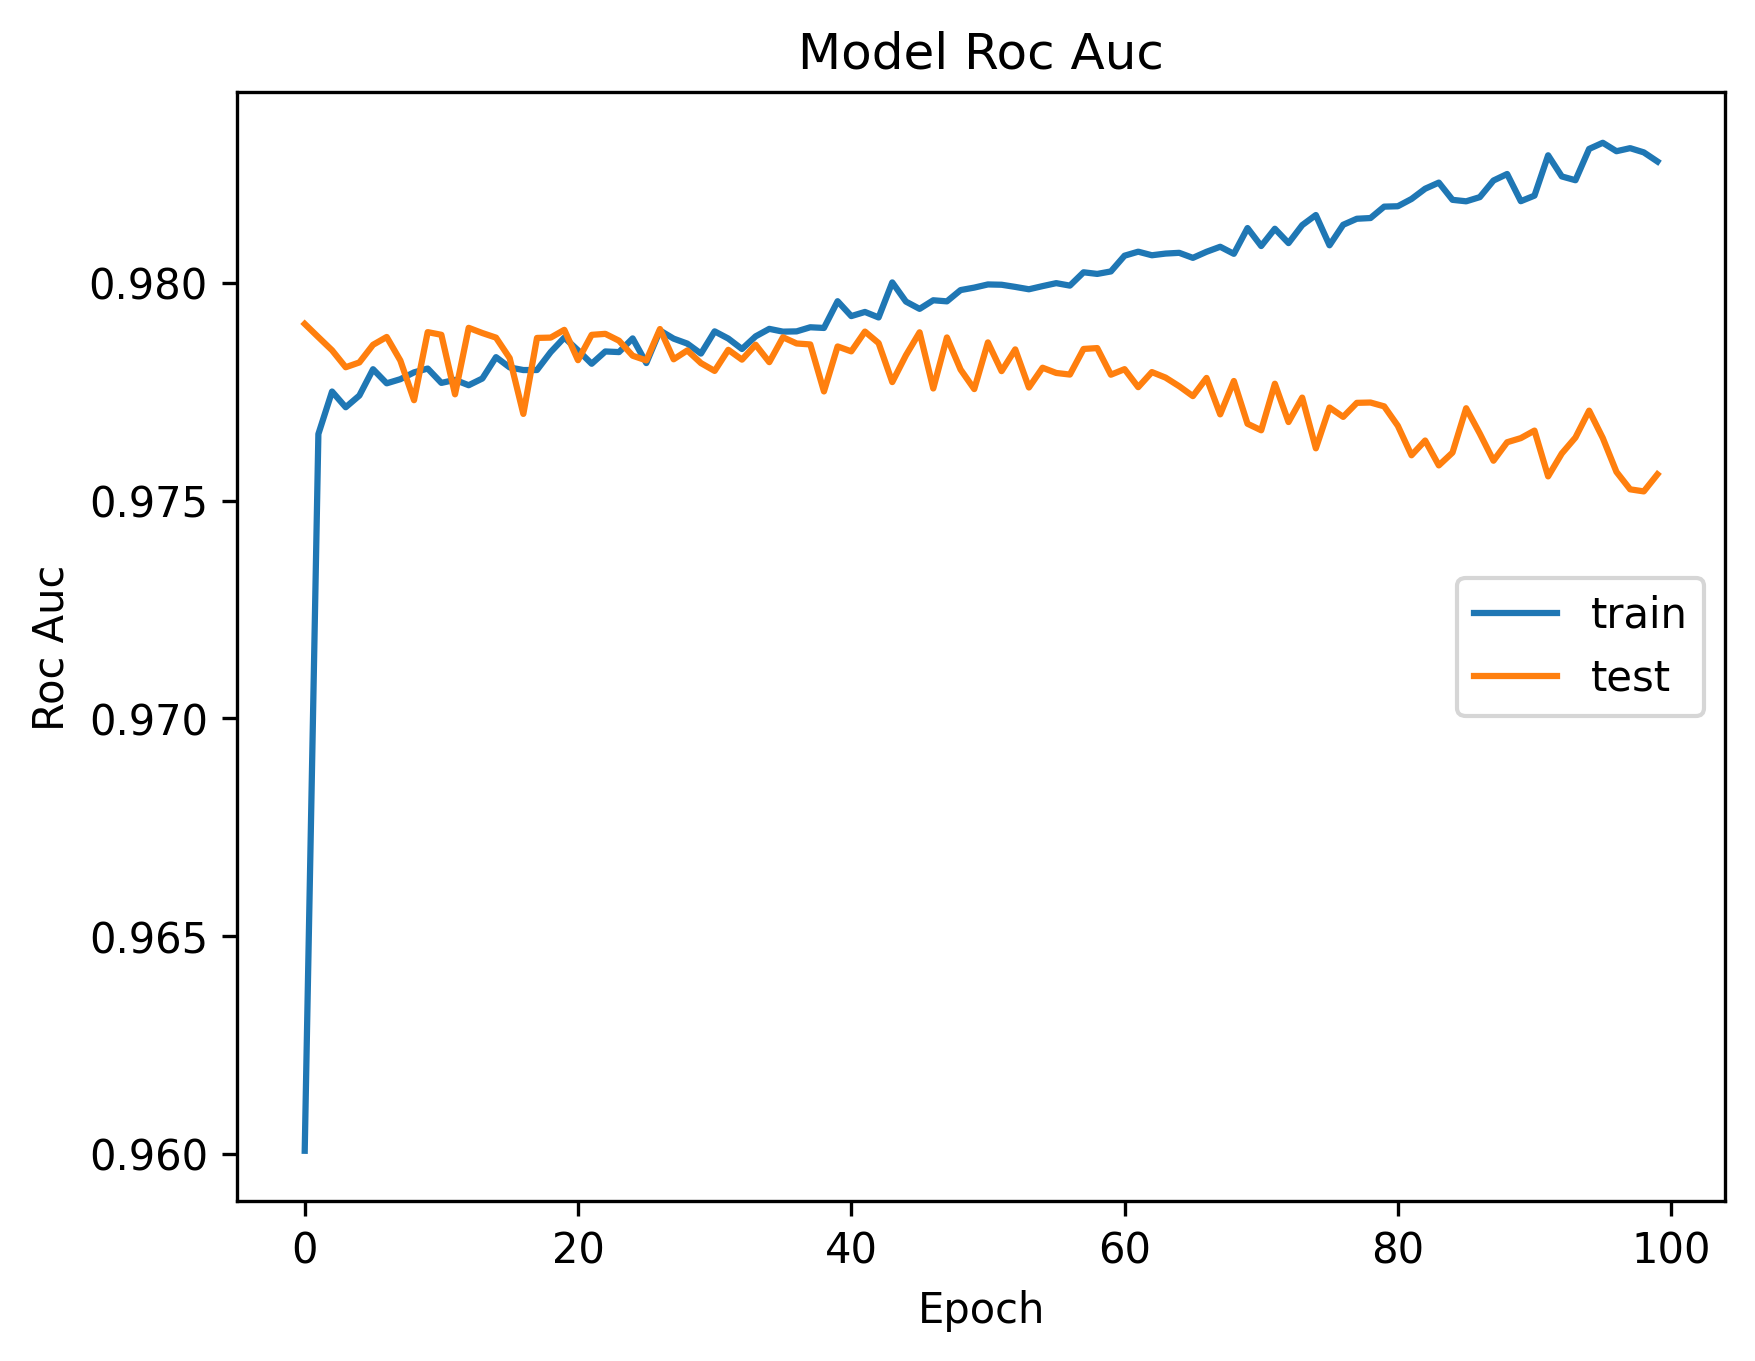

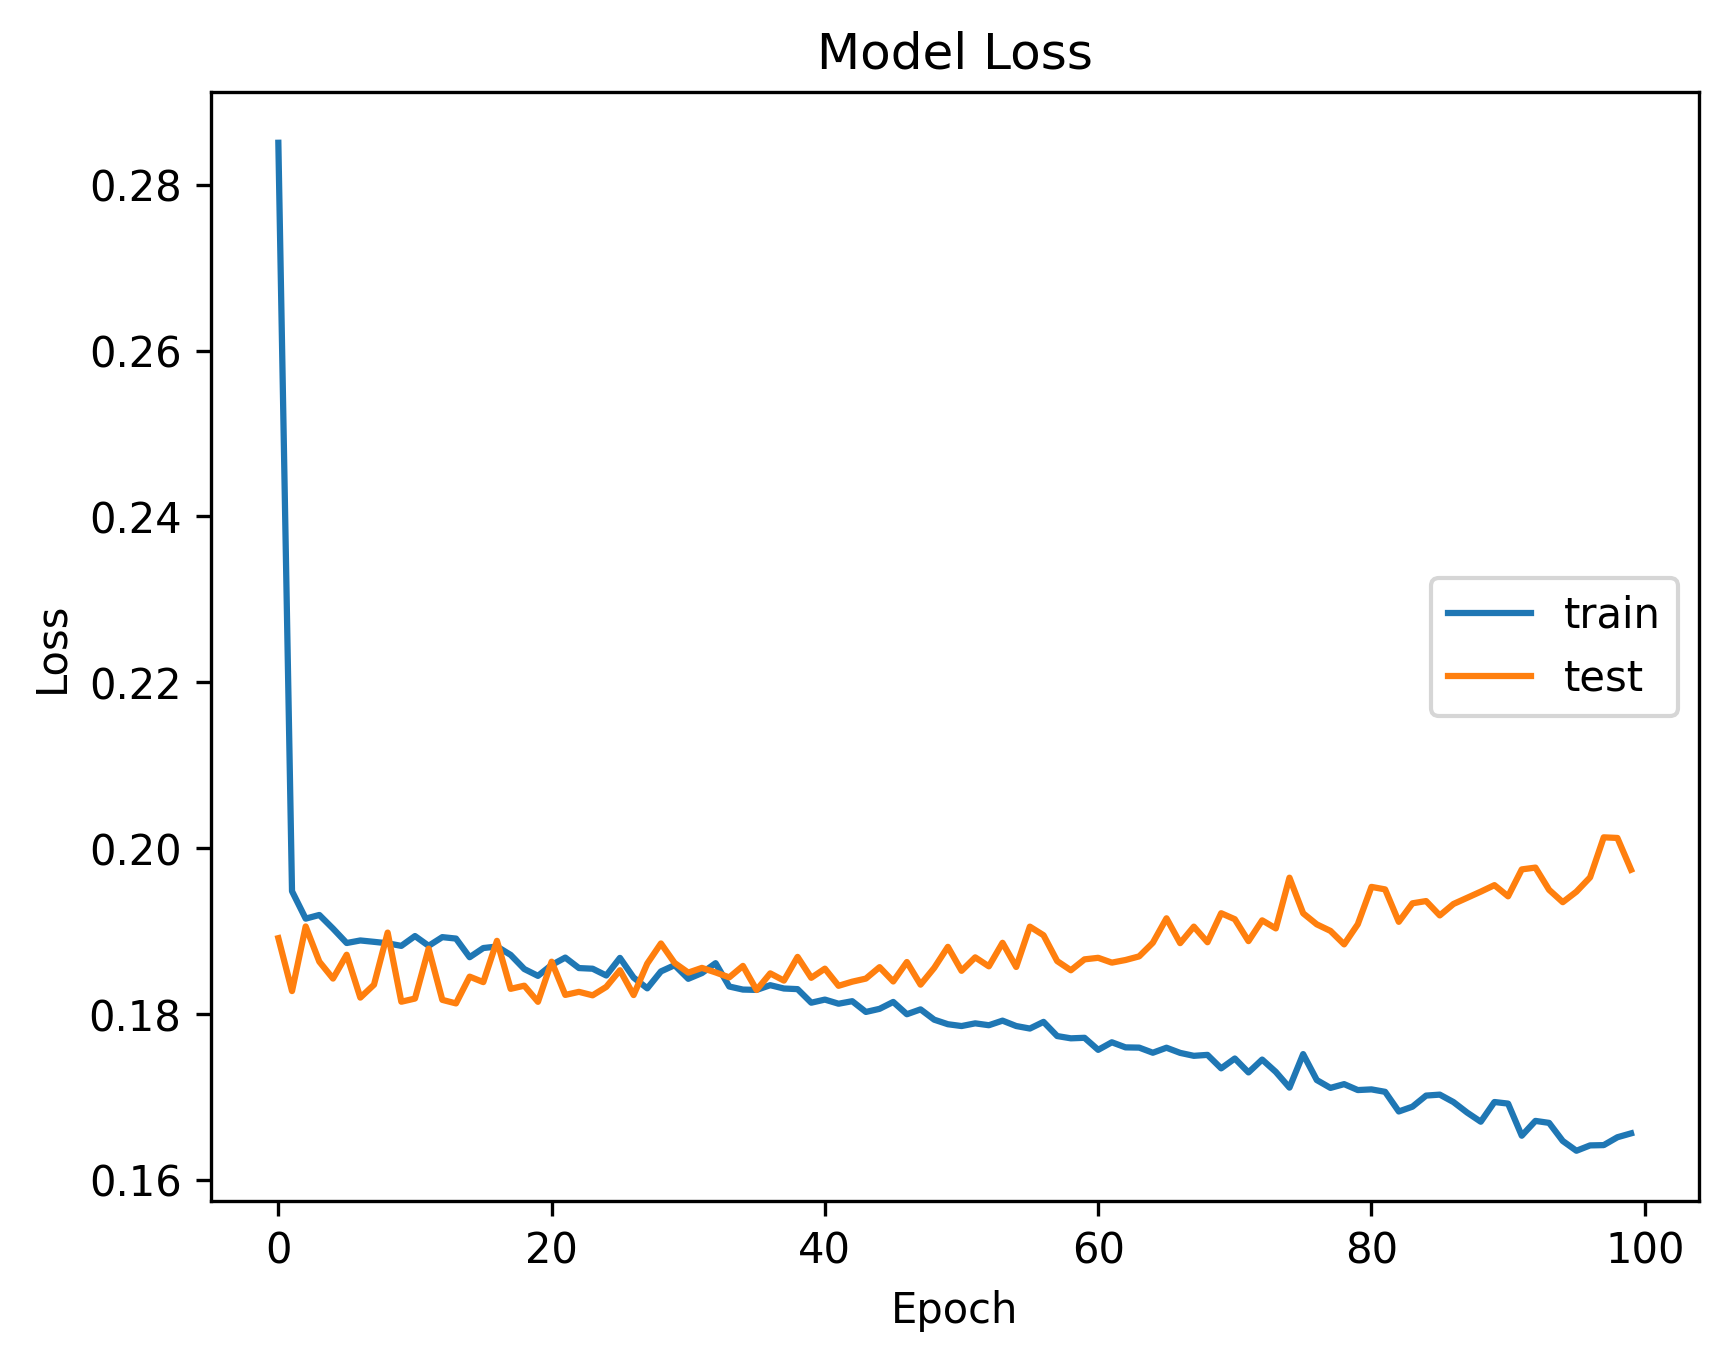

In [105]:
# Model metrics history
plt.plot(dl_hist.history['accuracy'])
plt.plot(dl_hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'center right')
plt.rcParams['figure.dpi'] = 300
plt.show()

plt.plot(dl_hist.history['roc_auc'])
plt.plot(dl_hist.history['val_roc_auc'])
plt.title('Model Roc Auc')
plt.ylabel('Roc Auc')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'center right')
plt.rcParams['figure.dpi'] = 300
plt.show()
        
plt.plot(dl_hist.history['loss'])
plt.plot(dl_hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'center right')
plt.rcParams['figure.dpi'] = 300
plt.show()

Deep Learning Confusion Matrix


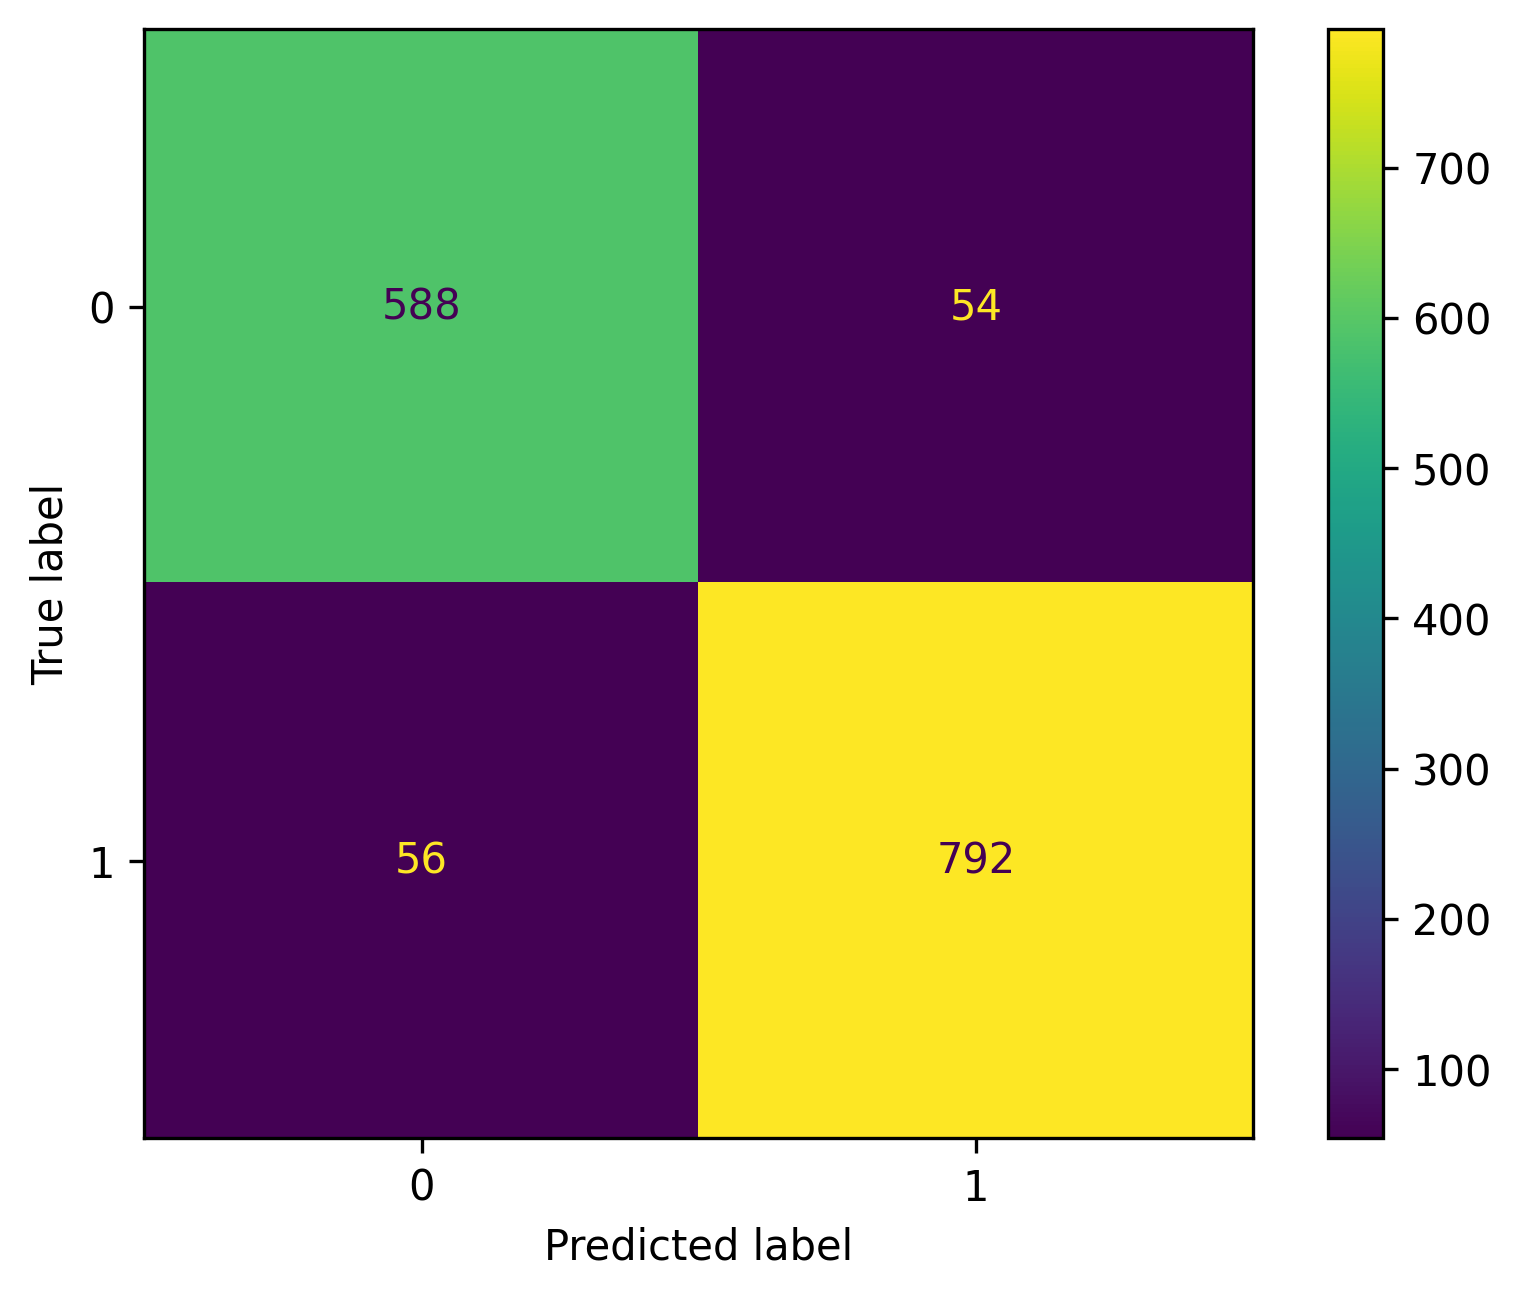

In [106]:
# Confusion matrix
dl_cm = confusion_matrix(y_test, dl_pred, labels = np.array([0,1]))
disp = ConfusionMatrixDisplay(confusion_matrix = dl_cm,
                              display_labels = np.array([0,1]))
print("Deep Learning Confusion Matrix")
disp.plot()
plt.show()

In [107]:
# Prediction rates
calculatePredictionRates("Deep Learning", dl_acc, dl_cm)


    The success rate of the Deep Learning model on the test set: 93%
    Cammeo correct prediction rate: 92%
    Osmancik correct prediction rate: 93%


In [108]:
# Updating comparison lists
updateLists("DeepLearning", dl_clf, dl_pred, dl_pred_proba, dl_acc, dl_cm, dl_f1, dl_prec, dl_recall, dl_roc_auc, dl_acc_tr)

# **5.Model Comparison**

#### **5.1.Comparison list**

In [109]:
comp_list = [acc_list, roc_auc_list, prec_list, recall_list, f1_list]
comp_list_df = pd.DataFrame((np.array(comp_list) * 100), index = metrics, columns = model_names)
comp_list_df

DecisionTree        XGB        SVC  LogisticRegression  \
Accuracy      92.953020  92.684564  92.818792           93.288591   
Roc Auc       92.654882  92.551468  92.745070           93.119967   
Precision     92.947977  93.624557  94.054697           93.896714   
Recall        94.811321  93.514151  93.278302           94.339623   
F1 Score      93.870403  93.569322  93.664890           94.117647   

           RandomForest  DeepLearning  
Accuracy      93.020134     92.617452  
Roc Auc       92.808441     92.492506  
Precision     93.457944     93.617021  
Recall        94.339623     93.396226  
F1 Score      93.896714     93.506494

#### **5.2.Barplot for comparison of all metrics and models**

In [110]:
def compare_metrics_barplot(comparison_list, model_list, metric_list, color_list):
    size = range(len(model_list))
    color_list = cmap
    w = 0.15
    
    # Selecting metrics one by one for all models
    def select_metrics(comparison_list, metric_list):
        row_list = []
        for metric in metric_list:
            row_out = list(comparison_list.loc[metric])
            row_list.append(row_out)
        return row_list
    
    y = select_metrics(comparison_list, metric_list)
    
    # Figure size
    plt.figure(figsize = (10, 5))
    # Positions, colors, labels and axes
    for i in range(len(metric_list)):
        plt.bar([pos + (i * w) for pos in size], 
                y[i], 
                width = w, 
                align = "center", 
                label = metric_list[i],
                color = color_list[i])
    # Display plot
    plt.xlabel("Models")
    plt.ylabel("Rate")
    plt.title("Metrics Comparison")
    plt.xticks([pos + (2 * w) for pos in size], model_list, rotation = 15)
    plt.yticks(np.arange(0, 105, 5))
    plt.legend(bbox_to_anchor = (1, 1), loc = "best")
    plt.show()

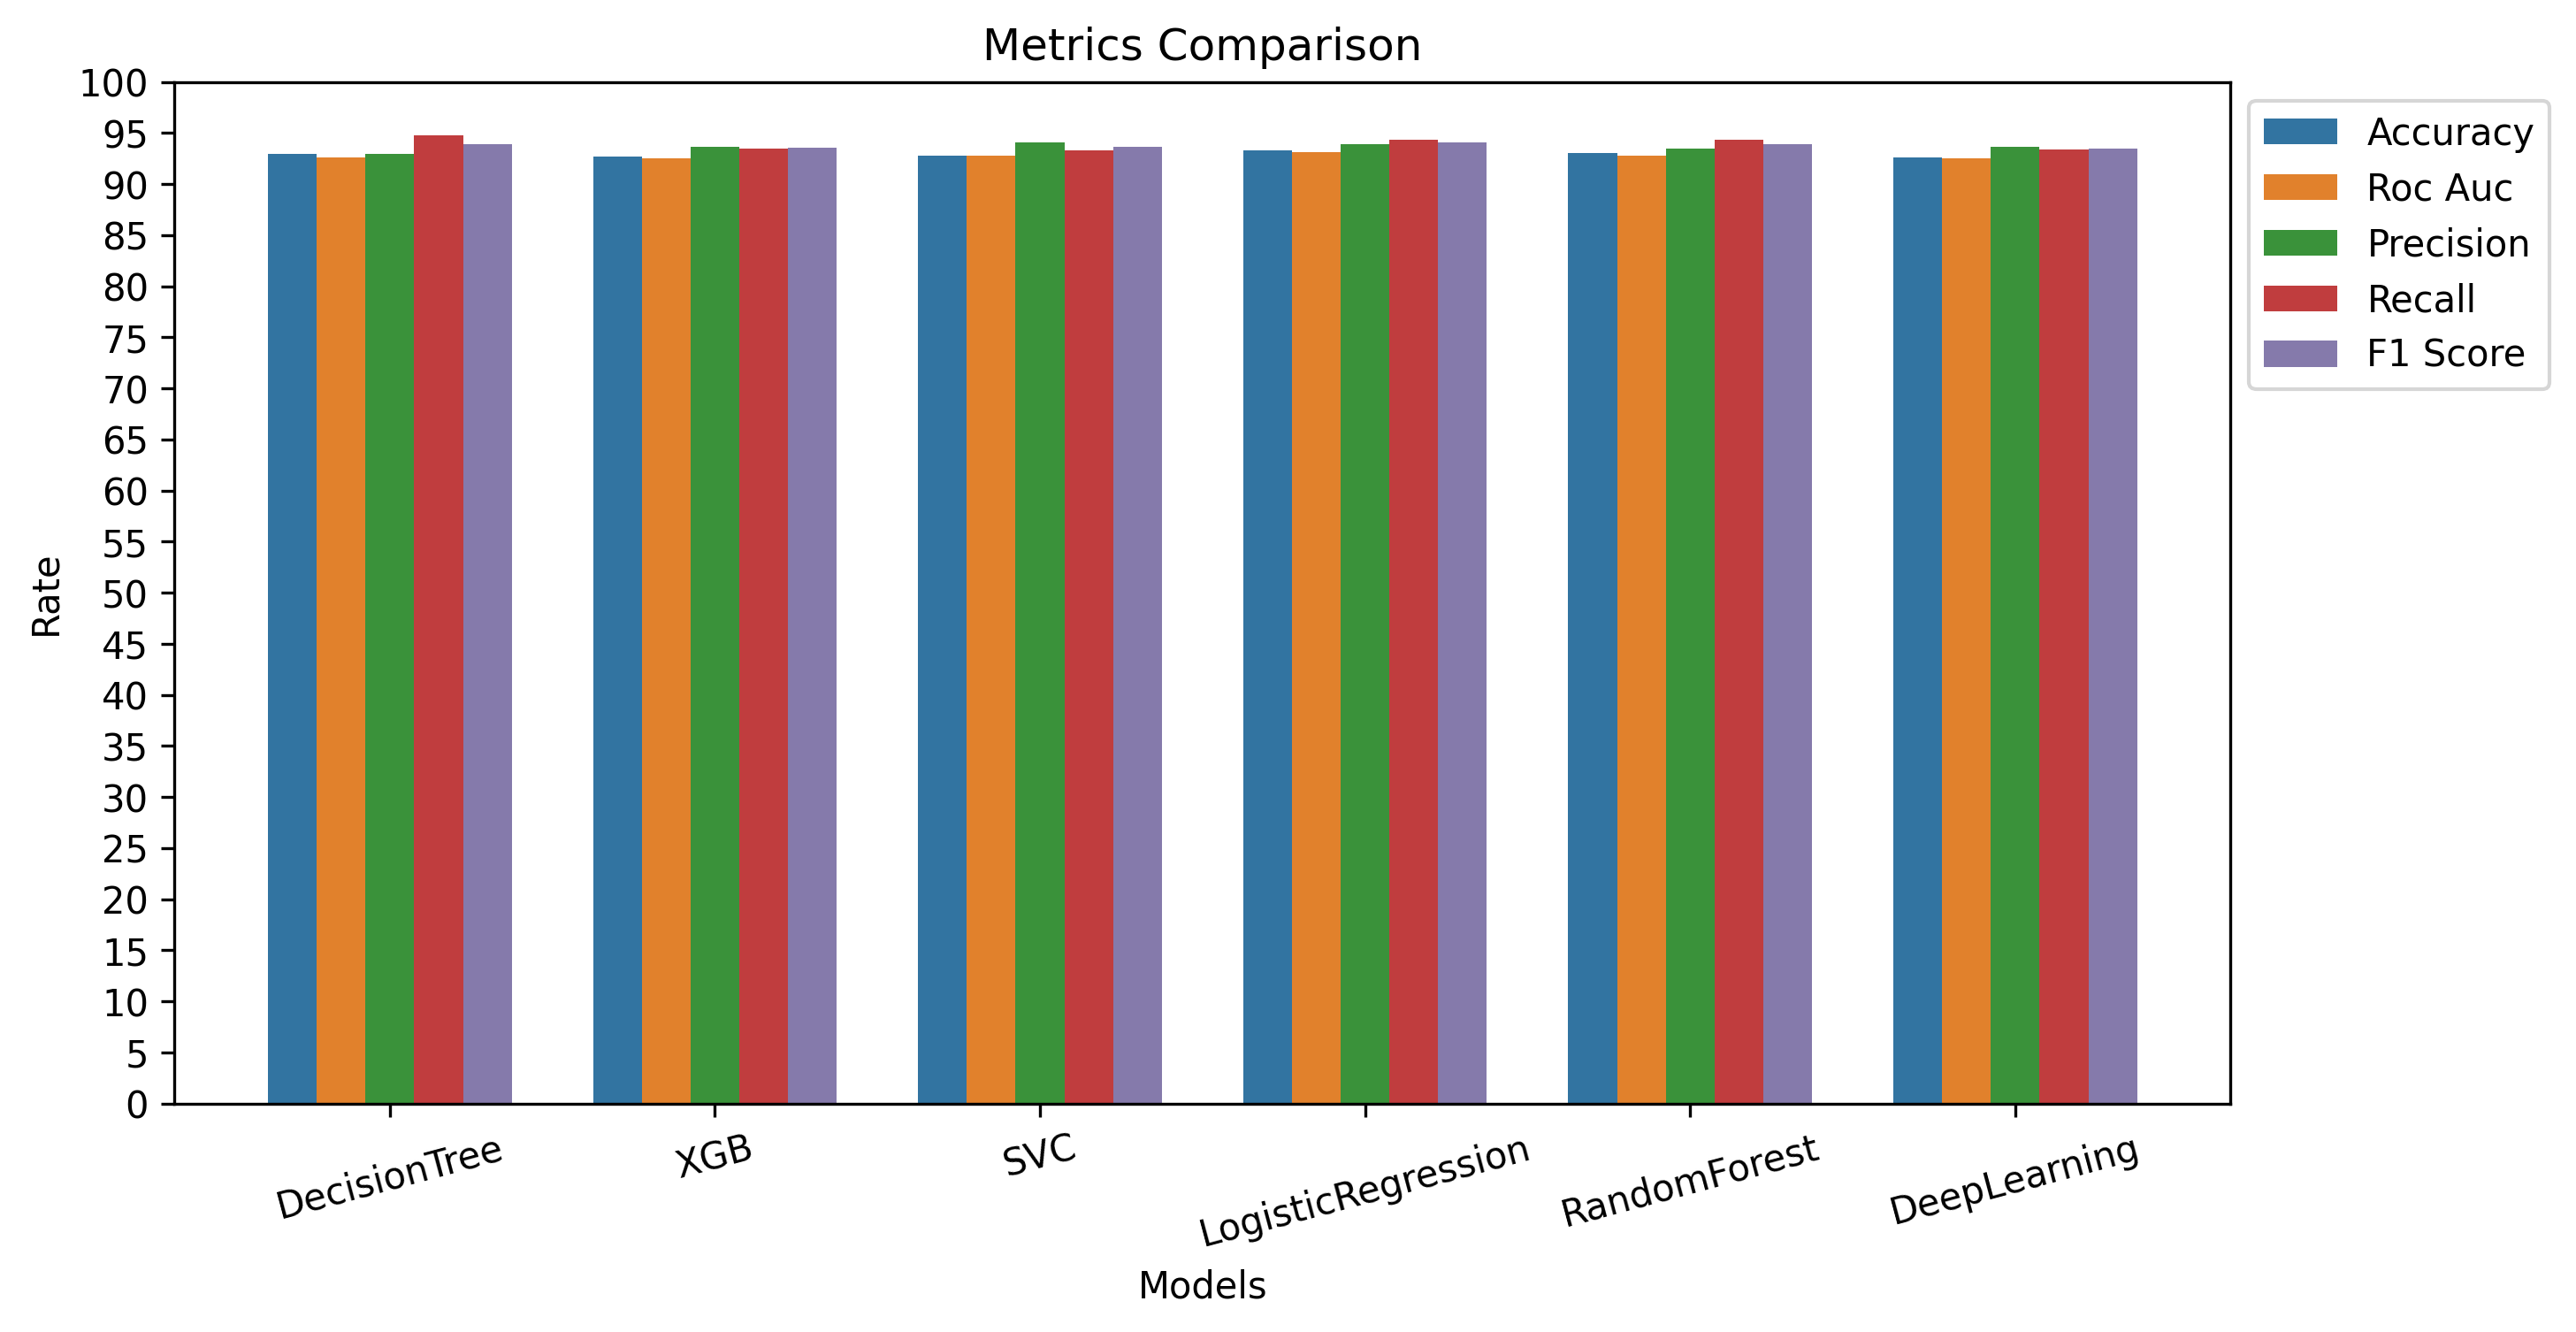

In [111]:
compare_metrics_barplot(comp_list_df, model_names, metrics, cmap)

#### **5.3.Comparison of models test & training accuracies**

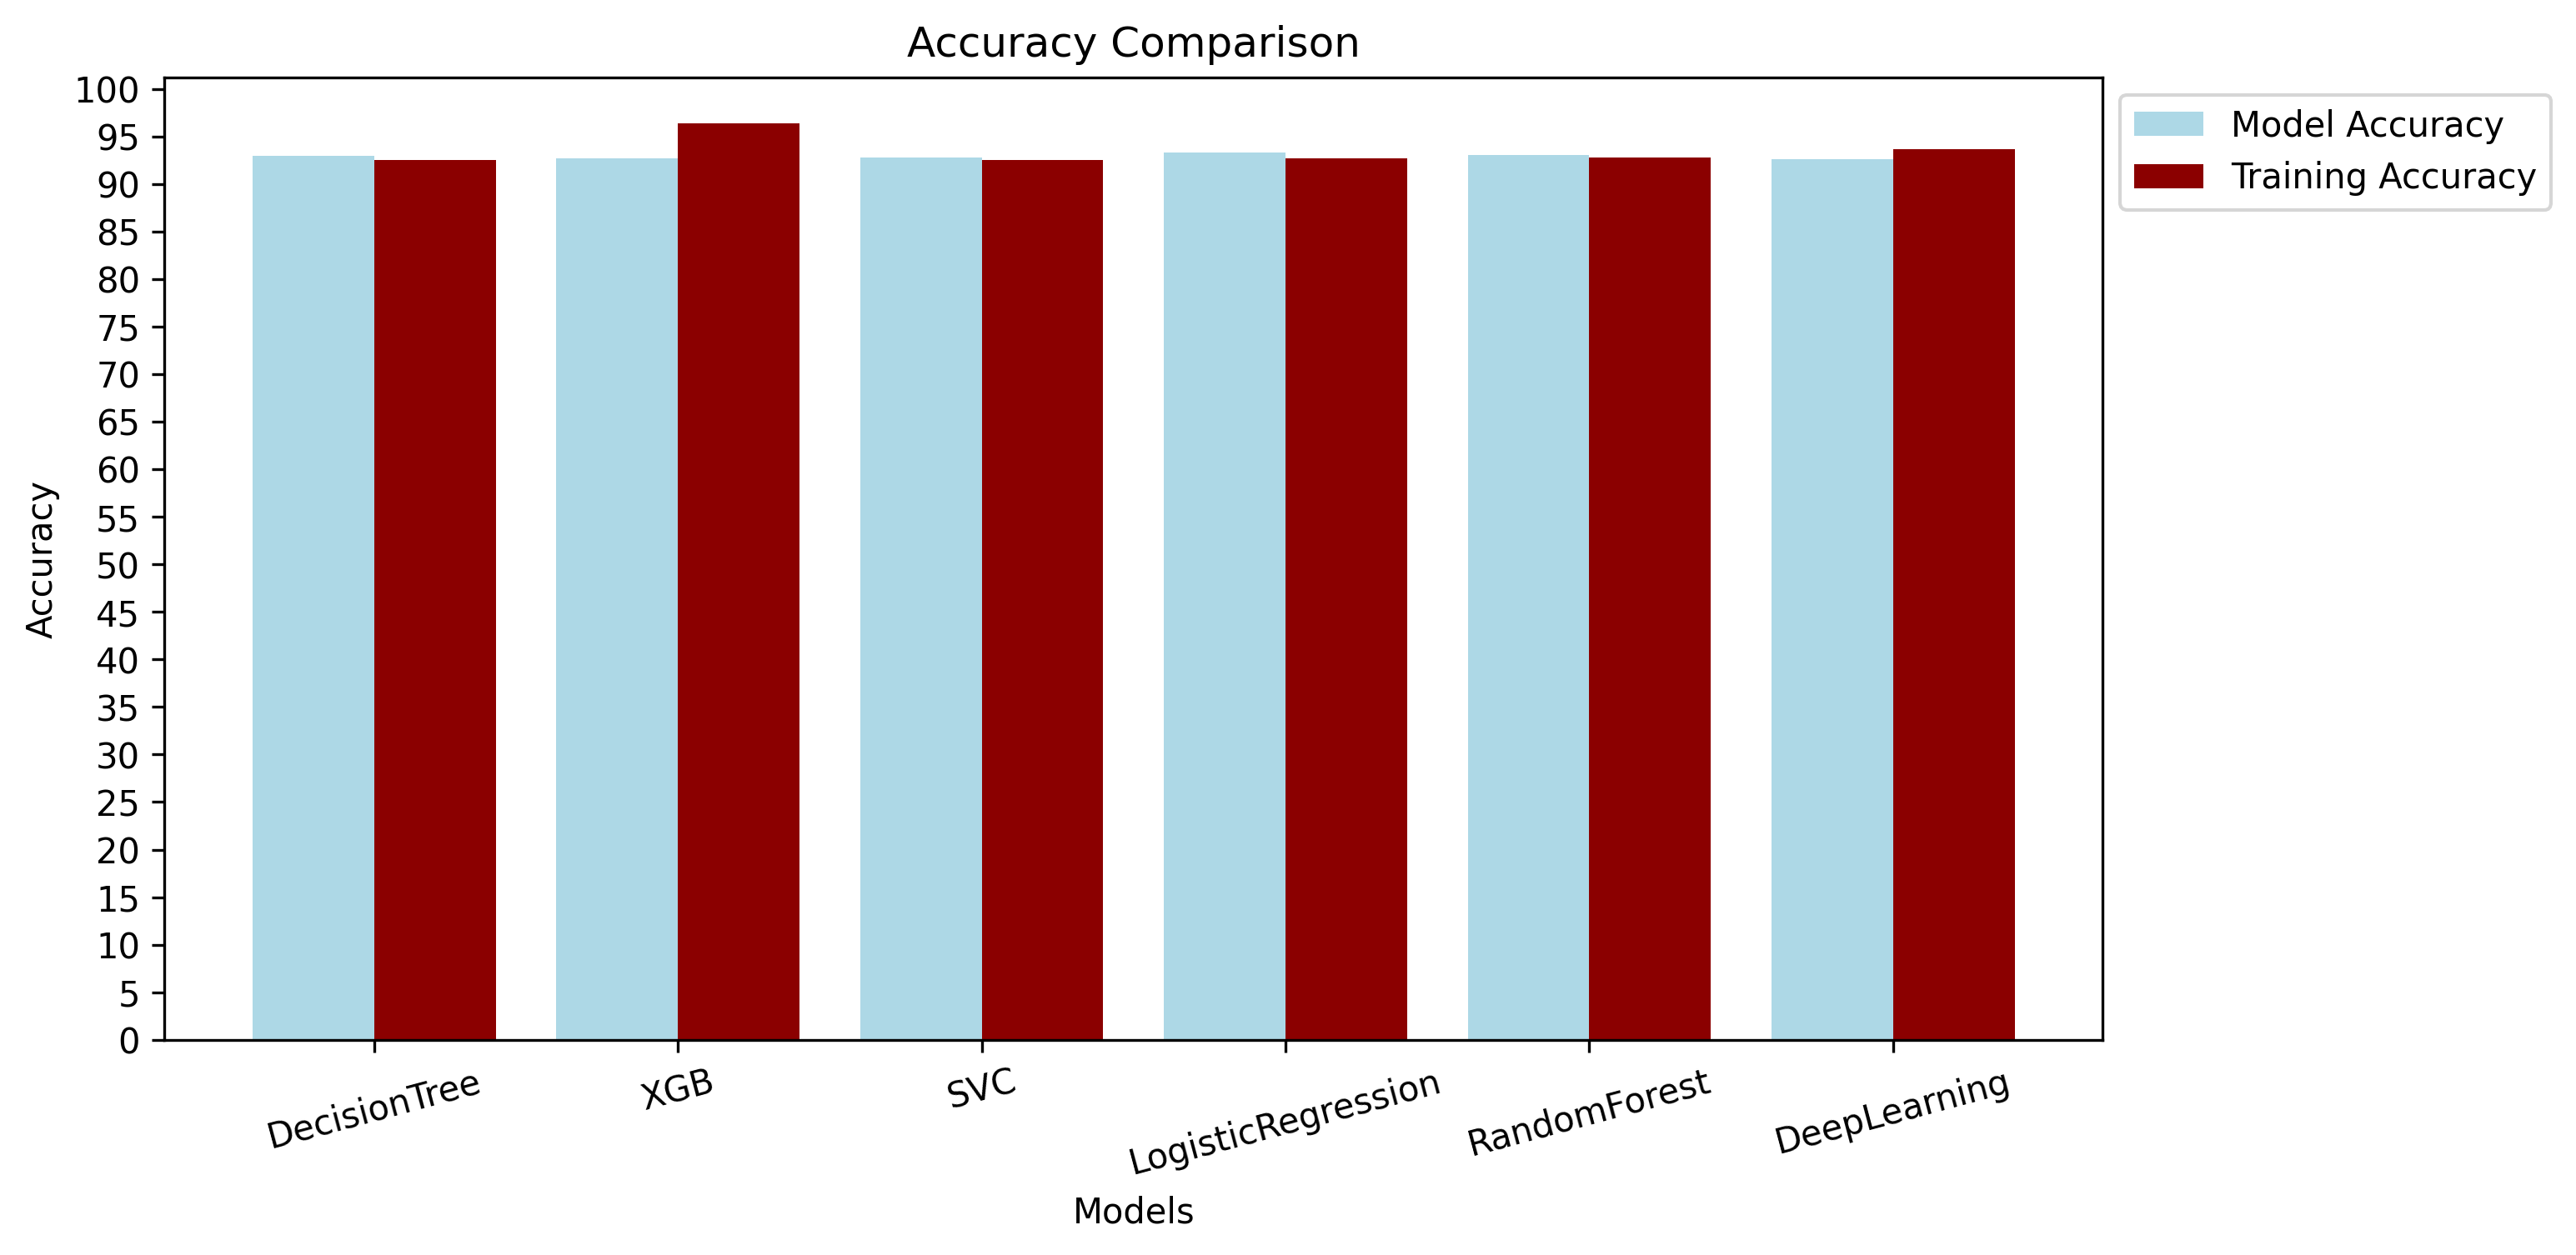

In [112]:
plt.figure(figsize = (10, 5))

plt.bar(np.arange(len(model_names)) - 0.2, 
        np.array(acc_list)*100, 0.4, label = "Model Accuracy", color = "lightblue") 
plt.bar(np.arange(len(model_names)) + 0.2, 
        np.array(tr_acc_list)*100, 0.4, label = "Training Accuracy", color = "darkred") 
plt.xticks(np.arange(len(model_names)), model_names, rotation = 15)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.yticks(np.arange(0, 105, 5))
plt.legend(bbox_to_anchor = (1, 1), loc = "best")
plt.show()

#### **5.4.Comparison of confusion matrices**

In [113]:
def plot_roc_curves(figure_size, model_names, pred_proba_list):
    # Setting up plotting area
    plt.figure(0).clf()
    plt.figure(figsize = figure_size)

    for i in range(len(model_names)):
        if model_names[i] == "DeepLearning":
            fpr, tpr, _ = roc_curve(y_test, pred_proba_list[i][:, 0])
            auc = round(roc_auc_score(y_test, pred_proba_list[i][:, 0]), 3)
            plt.plot(fpr, tpr, label = (model_names[i] + "; auc = " + str(auc)))
            plt.legend(loc = "lower right")
        else:
            fpr, tpr, _ = roc_curve(y_test, pred_proba_list[i][:, 1])
            auc = round(roc_auc_score(y_test, pred_proba_list[i][:, 1]), 3)
            plt.plot(fpr, tpr, label = (model_names[i] + "; auc = " + str(auc)))
            plt.legend(loc = "lower right")

<Figure size 1920x1440 with 0 Axes>

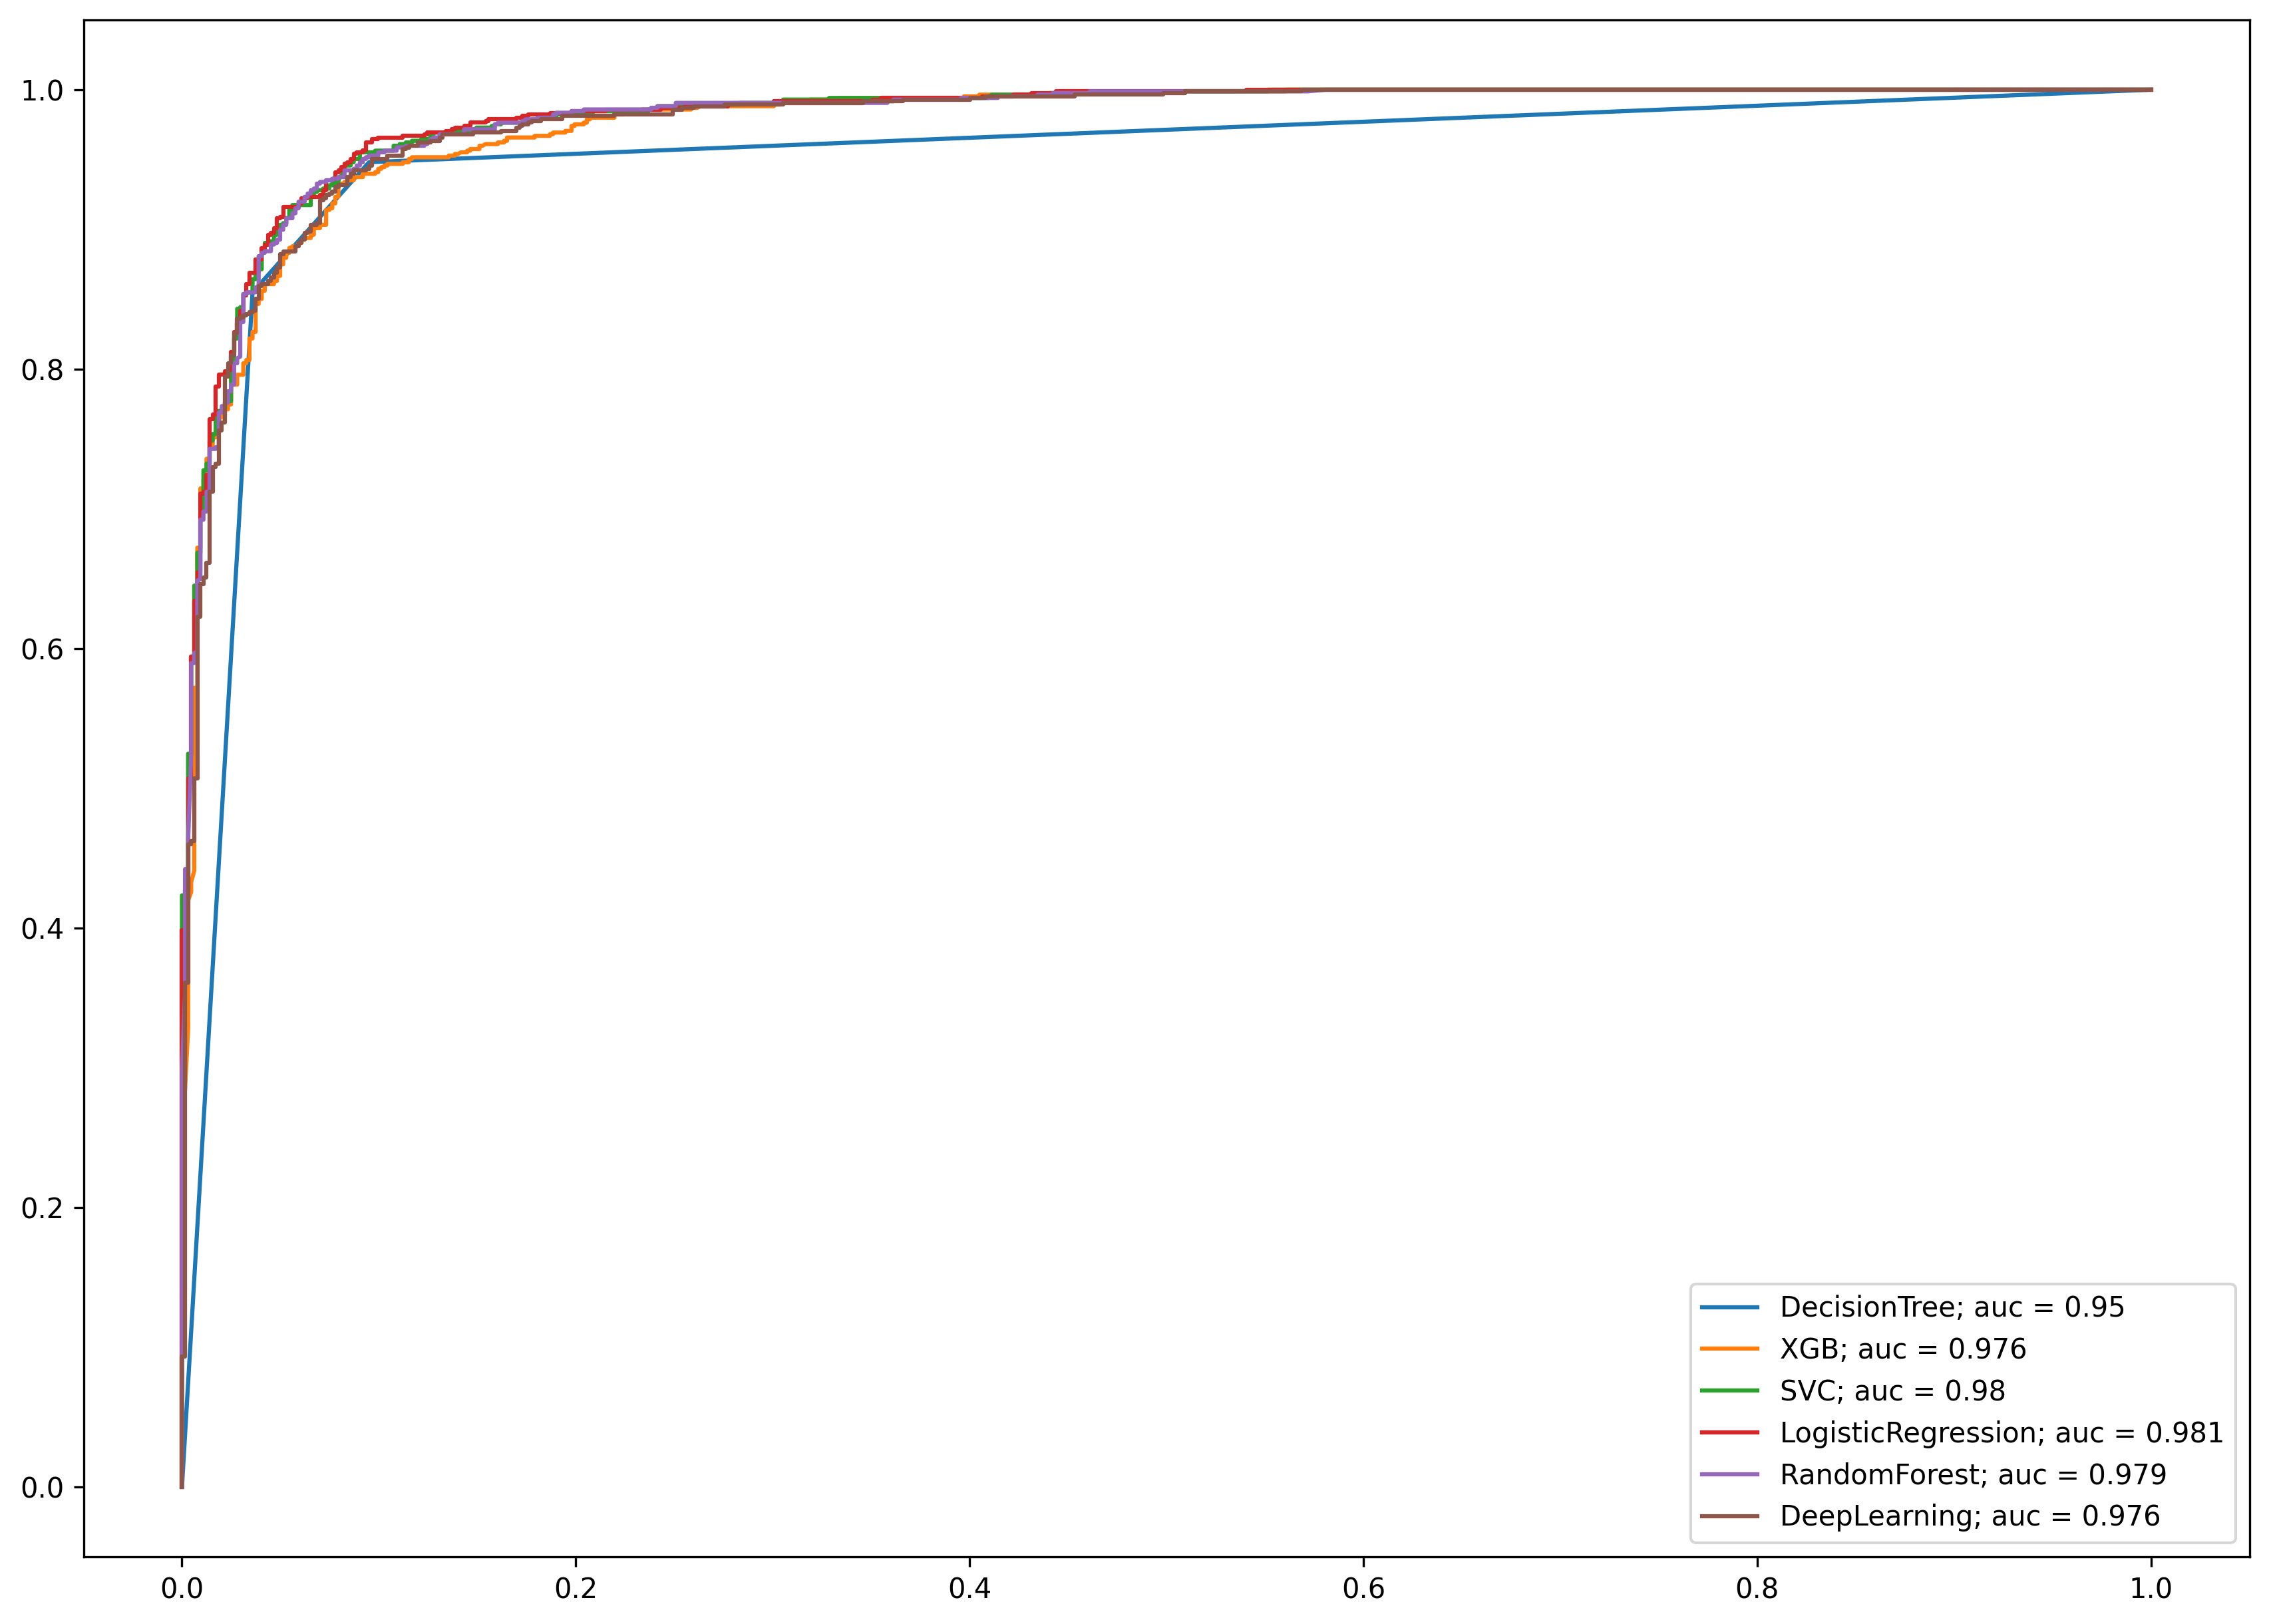

In [114]:
plot_roc_curves((14, 10), model_names, pred_proba_list)

#### **5.5.Comparison of confusion matrices**

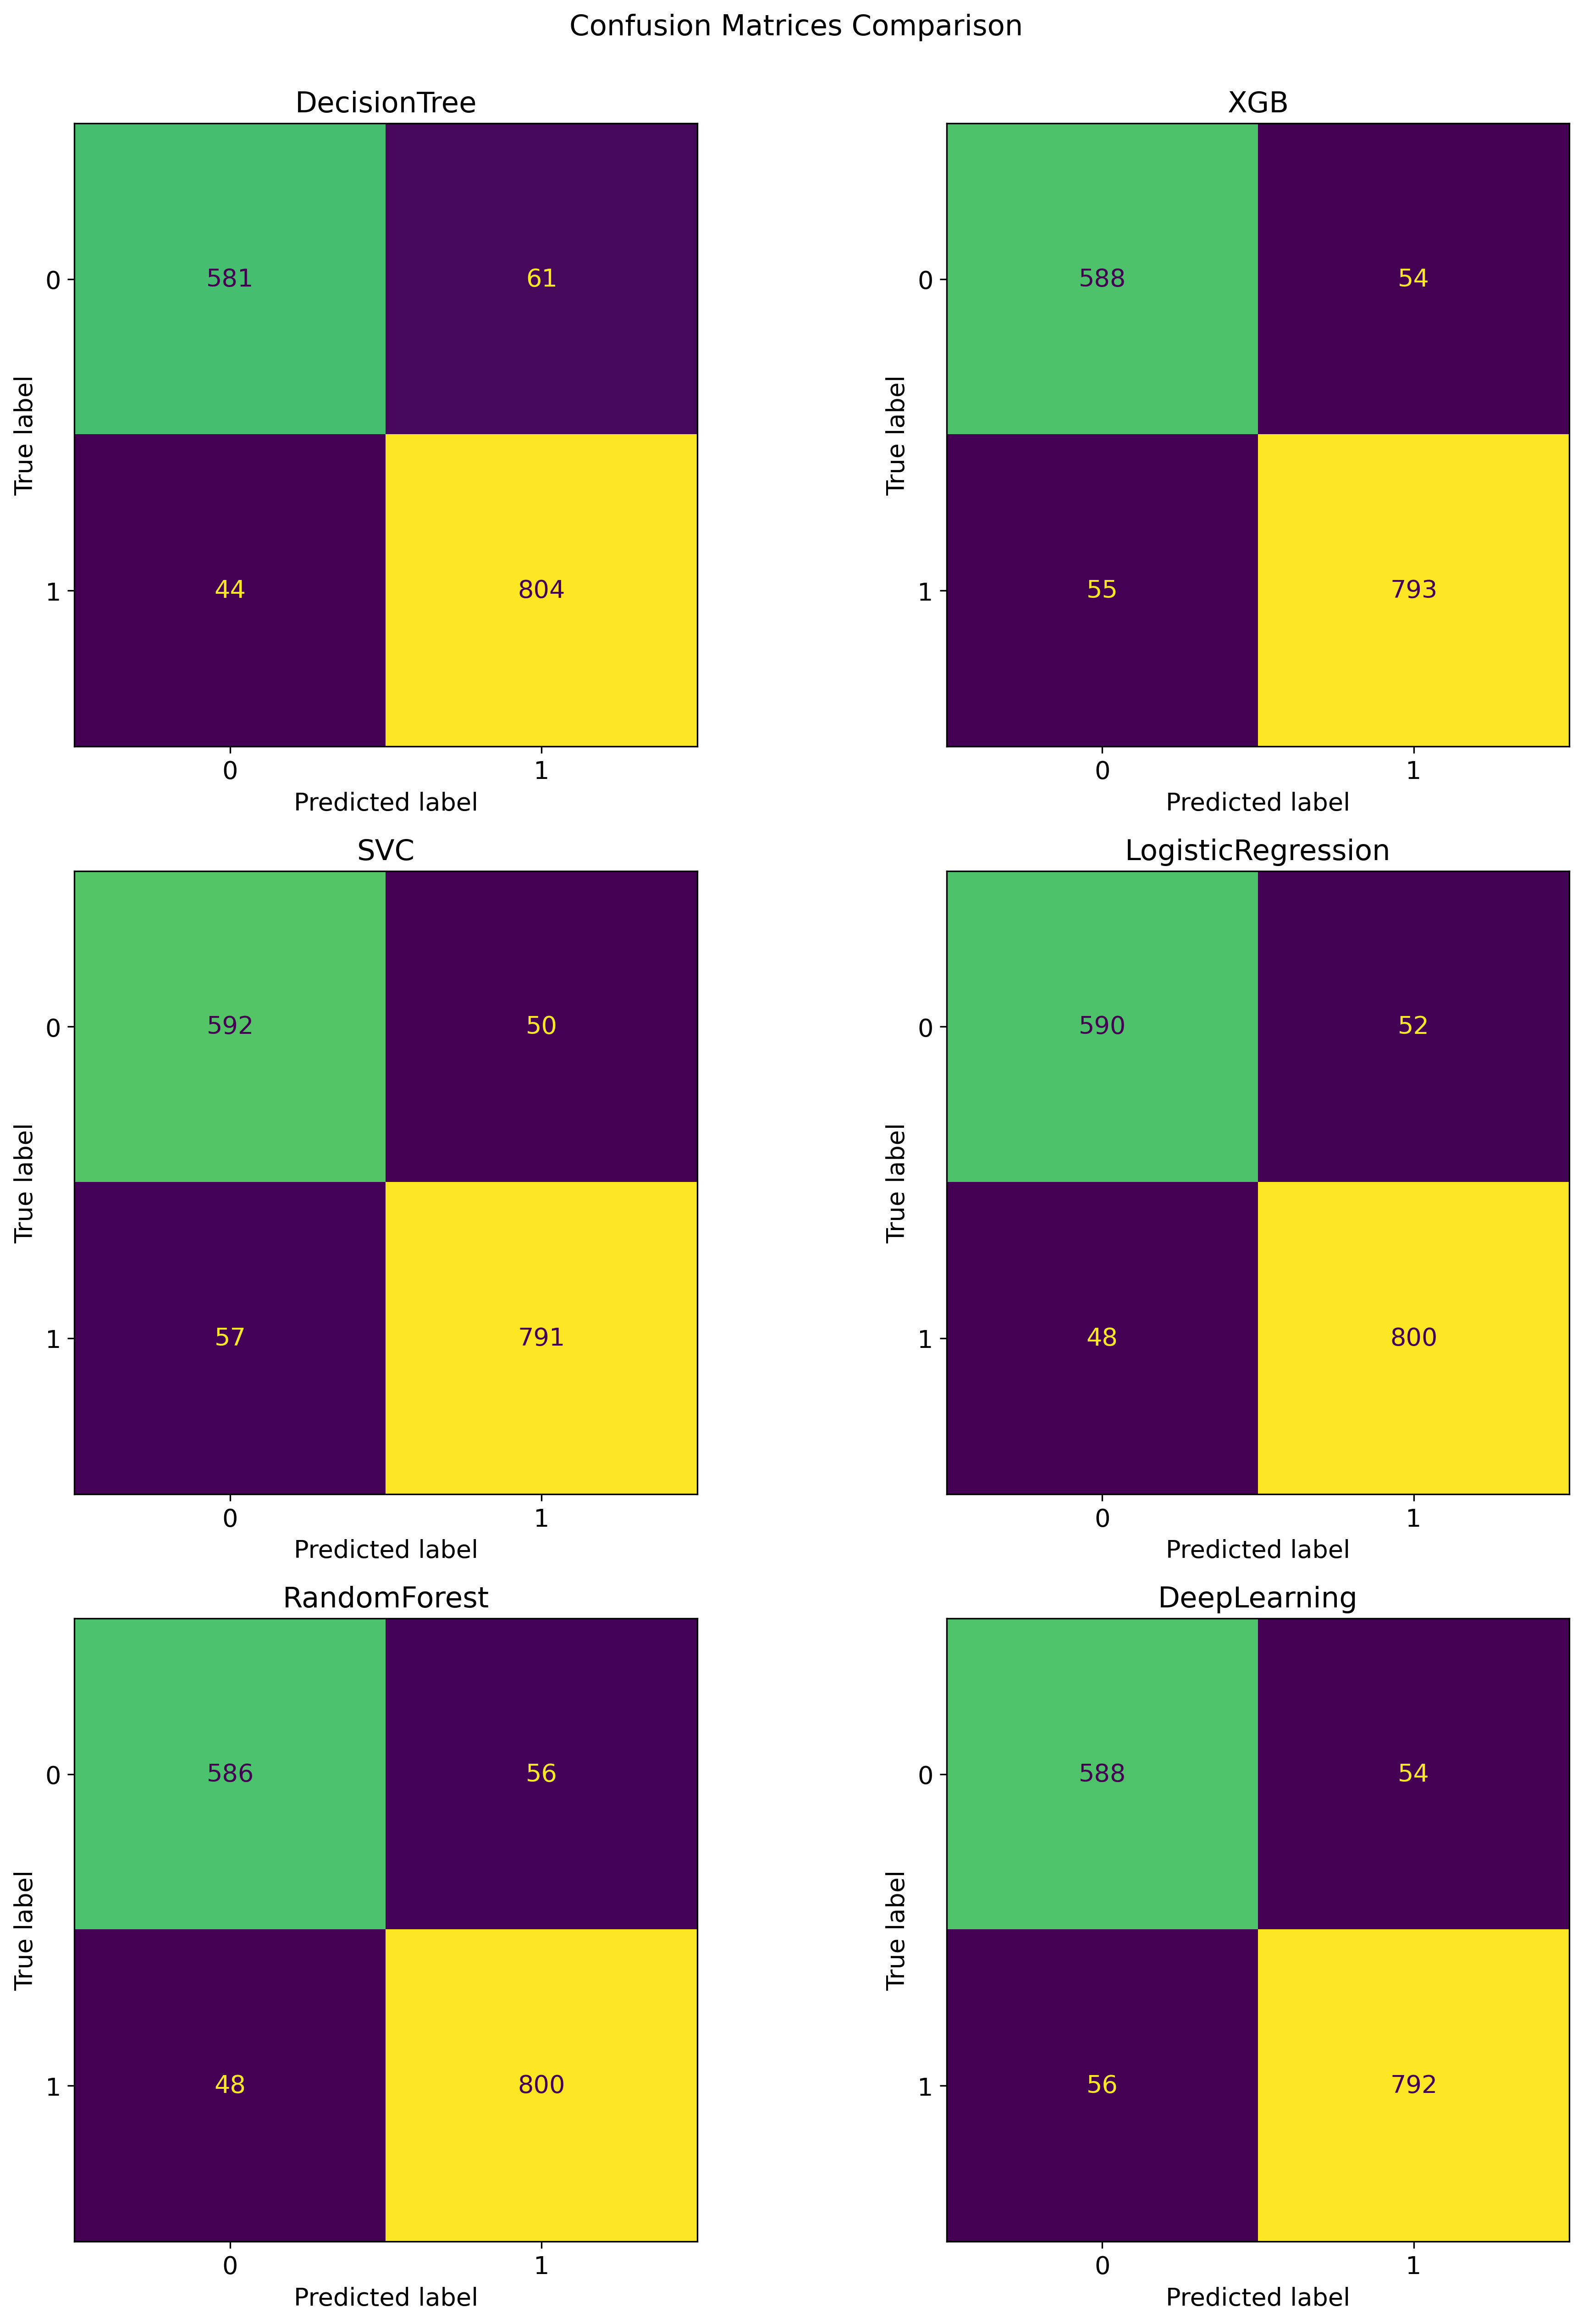

In [115]:
title_size = 15
plt.rcParams.update({"font.size": 13})
color_map = "viridis"
colorbar = False

# Subplots
f, axes = plt.subplots(3, 2, figsize = (15, 20))

for i, j in np.ndindex(axes.shape):

        axes[i, j].set_title(model_names[2*i + j], size = title_size)
        disp = ConfusionMatrixDisplay(confusion_matrix = cm_list[2*i + j], 
                                      display_labels = np.array([0,1]))
        disp.plot(include_values = True, cmap = color_map, ax = axes[i, j], colorbar = colorbar)
    
f.suptitle("Confusion Matrices Comparison", size = title_size, y=0.92)
plt.show()

# **6.Summary and Conclusion**

Even tough all models accuracy rates very close to each other (around 93%), according to roc curves above all of them are prone to overfit except the Decision Tree model. However, while the Decision Tree model predicts the Osmancık rice type more correctly than other models, it predicts the Cammeo rice type more incorrectly than other models. Also according to gini importances, it seems major axis lenght is the only important feature for the Decision Tree model.